# Machine Learning : Forecasting of CO₂ emissions and renewable energy growth across countries




Multivariate Forecasting of CO₂ Emissions and Renewable Energy Growth Across Countries Using Energy-Economic Indicators : 
- Predict *future CO₂ emissions (Value_co2_emissions_kt_by_country)* and *Renewable energy share in total final energy consumption (%)* for each country.
- Identify which energy and economic indicators (e.g., fossil fuels, GDP growth, renewables capacity) most affect CO₂ emissions and renewable growth.
- Group countries with similar energy transition trajectories to identify *leaders, laggards, and emerging adopters*.


# PART 1 : Descriptive analysis of the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_excel("Datasetprojet.xlsx")
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density(P/Km2)  Land Area(Km2)  Latitude  Longitude  
0            60.0        652230.0  33.93911  67.709953  
1            

Basic info about the dataset

In [6]:
print("Dataset info")
df.info()

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fos

In [7]:
print("Shape of the dataset")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Shape of the dataset
Rows: 3649, Columns: 21


In [8]:
print("Columns")
print(df.columns.tolist())

Columns
['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


Descriptive statistics

In [10]:
df.describe().T

count          mean  \
Year                                                3649.0  2.010038e+03   
Access to electricity (% of population)             3639.0  7.893370e+01   
Access to clean fuels for cooking                   3480.0  6.325529e+01   
Renewable-electricity-generating-capacity-per-c...  2718.0  1.131375e+02   
Financial flows to developing countries (US $)      1560.0  9.422400e+07   
Renewable energy share in the total final energ...  3455.0  3.263816e+01   
Electricity from fossil fuels (TWh)                 3628.0  7.036500e+01   
Electricity from nuclear (TWh)                      3523.0  1.345019e+01   
Electricity from renewables (TWh)                   3628.0  2.396801e+01   
Low-carbon electricity (% electricity)              3607.0  3.680118e+01   
Primary energy consumption per capita (kWh/person)  3649.0  2.574398e+04   
Energy intensity level of primary energy (MJ/$2...  3442.0  5.307345e+00   
Value_co2_emissions_kt_by_country                   3221.0  1.598665e+05   
Renewables (% equivalent primary energy)            1512.0  1.198671e+01   
gdp_growth                                          3332.0  3.441610e+00   
gdp_per_capita                                      3367.0  1.328377e+04   
Density(P/Km2)                                      3648.0  1.370518e+02   
Land Area(Km2)                                      3648.0  6.332135e+05   
Latitude                                            3648.0  1.824639e+01   
Longitude                                           3648.0  1.482269e+01   

                                                             std          min  \
Year                                                6.054228e+00  2000.000000   
Access to electricity (% of population)             3.027554e+01     1.252269   
Access to clean fuels for cooking                   3.904366e+01     0.000000   
Renewable-electricity-generating-capacity-per-c...  2.441673e+02     0.000000   
Financial flows to developing countries (US $)      2.981544e+08     0.000000   
Renewable energy share in the total final energ...  2.989490e+01     0.000000   
Electricity from fossil fuels (TWh)                 3.480519e+02     0.000000   
Electricity from nuclear (TWh)                      7.300662e+01     0.000000   
Electricity from renewables (TWh)                   1.044311e+02     0.000000   
Low-carbon electricity (% electricity)              3.431488e+01     0.000000   
Primary energy consumption per capita (kWh/person)  3.477322e+04     0.000000   
Energy intensity level of primary energy (MJ/$2...  3.532020e+00     0.110000   
Value_co2_emissions_kt_by_country                   7.736611e+05    10.000000   
Renewables (% equivalent primary energy)            1.499464e+01     0.000000   
gdp_growth                                          5.686720e+00   -62.075920   
gdp_per_capita                                      1.970987e+04   111.927225   
Density(P/Km2)                                      1.683622e+02     1.000000   
Land Area(Km2)                                      1.585519e+06    21.000000   
Latitude                                            2.415923e+01   -40.900557   
Longitude                                           6.634815e+01  -175.198242   

                                                              25%  \
Year                                                  2005.000000   
Access to electricity (% of population)                 59.800890   
Access to clean fuels for cooking                       23.175000   
Renewable-electricity-generating-capacity-per-c...       3.540000   
Financial flows to developing countries (US $)      260000.000000   
Renewable energy share in the total final energ...       6.515000   
Electricity from fossil fuels (TWh)                      0.290000   
Electricity from nuclear (TWh)                           0.000000   
Electricity from renewables (TWh)                        0.040000   
Low-carbon electricity (% electricity)                   2.87784

Global trend of electricity access over time

Global mean access per year

In [ ]:
global_trend = df.groupby("Year")["Access to electricity (% of population)"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=global_trend, x="Year", y="Access to electricity (% of population)")
plt.title("Global trend of electricity access (2000–2020)")
plt.ylabel("Average access to electricity (%)")
plt.xlabel("Year")
plt.show()

*The global electricity access increased steadily from approximately 70% in 2000 to almost 86% in 2020.*

Spatial distribution

In [ ]:
df_2020 = df[df["Year"] == 2020]

fig = px.scatter_geo(
    df_2020,
    lat="Latitude",
    lon="Longitude",
    color="Access to electricity (% of population)",
    hover_name="Entity",
    size="Access to electricity (% of population)",
    color_continuous_scale="Viridis",
    title="Access to electricity by country (2020)"
)
fig.show()

*There is a variation of access to electricity across countries : some are near 100%, others below 40%.*

Distribution of the target variable

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Access to electricity (% of population)"], bins=30, kde=True)
plt.title("Distribution of access to electricity")
plt.xlabel("Access to electricity (%)")
plt.ylabel("Number of observations")
plt.show()

*The percentage of population per country who has access to electricity is mostly 100%, but as said before, for some countries it varies between 5% to 90% of the population.*


In [ ]:
cols_to_check = [    'Primary energy consumption per capita (kWh/person)',    'gdp_per_capita',
                 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',    'Electricity from renewables (TWh)']

# Regrouper par pays et calculer la moyenne de chaque variable
df_country_mean = df.groupby("Entity")[cols_to_check].mean().reset_index()

# Histogrammes à partir des moyennes par pays
df_country_mean[cols_to_check].hist(figsize=(10,8), bins=30)
plt.legend()
plt.show()


*We can see that : a majority of countries have a really small primary energy consumption per capita, same with gdp per capita. Developed countries are a lot fewer and tend to have a lot higher energy consumption per capita.*

*Plus, most countries have relatively low energy intensity values, while a smaller number of countries exhibit much higher intensities, creating a long tail toward the right. This indicates that only a few economies use energy very inefficiently relative to their economic output.
And the vast majority of countries produce very little renewable electricity, close to zero, while a small number of countries generate extremely large amounts (several hundred TWh). This strong imbalance reflects the fact that renewable electricity production is dominated by a few large producers, whereas most countries contribute only marginally.*

**

#  PART 2 : Descriptive analysis of the dataset Dataframe cleaning

### A. Volume of data

*As we're going to do time series prediction we first need to be sure there is enough data, year in our case, to train the model.*

In [11]:
df.groupby("Entity")["Year"].count().sort_values()

Entity
French Guiana     1
South Sudan       8
Montenegro       14
Serbia           14
Afghanistan      21
                 ..
Georgia          21
Germany          21
Ghana            21
Ethiopia         21
Zimbabwe         21
Name: Year, Length: 176, dtype: int64

*We can see that only 4 countries don't have the twenty year background. French Guiana obviously doesn't have enough volume. We take out South Sudan too. We choose to keep country over 14 years data background.*

In [12]:
df = df[~df['Entity'].isin(['French Guiana', 'South Sudan'])]
df.groupby("Entity")["Year"].count().sort_values()

Entity
Montenegro       14
Serbia           14
Afghanistan      21
New Caledonia    21
New Zealand      21
                 ..
Georgia          21
Germany          21
Ghana            21
Ethiopia         21
Zimbabwe         21
Name: Year, Length: 174, dtype: int64

### B. NAN values and Duplicates

In [13]:
df.duplicated(subset=['Entity', 'Year']).sum()

0

*There's no duplicated data.*

In [14]:
df_nan = df.isna().sum() / len(df) * 100
df_nan.sort_values()

Entity                                                               0.000000
Land Area(Km2)                                                       0.000000
Density(P/Km2)                                                       0.000000
Primary energy consumption per capita (kWh/person)                   0.000000
Latitude                                                             0.000000
Longitude                                                            0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.247253
Electricity from fossil fuels (TWh)                                  0.576923
Electricity from renewables (TWh)                                    0.576923
Low-carbon electricity (% electricity)                               1.153846
Electricity from nuclear (TWh)                                       3.461538
Access to clean fuels for cooking                               

*The columns Renewables (% equivalent primary energy) and Financial flows to developing countries have more than half of there data missing so we drop them.*


In [15]:
df = df.drop(columns = ['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)' ])
df

Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
0                                                  9.22      
1                                                  8.86      
2                                                  8.47      
3                                                  8.09      
4                                                  7.75      
...                                                 ...      
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Renewable energy share in the total final energy consumption (%)  \
0                                                 44.99                  
1                                                 45.60                  
2                                                 37.83                  
3                                                 36.66                  
4                                                 44.24                  
...                                                 ...                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                    0.16                             0.0   
1                                    0.09                             0.0   
2                                    0.13                             0.0   
3                                    0.31                             0.0   
4                                    0.33                             0.0   
...                                   ...                             ...   
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   
3648                                 3.40                             0.0   

      Electricity from renewables (TWh)  \
0                                  0.31   
1                               

In [16]:
nan_cols = [
    'Access to electricity (% of population)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Electricity from nuclear (TWh)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'gdp_per_capita',
    'gdp_growth',
    'Value_co2_emissions_kt_by_country',
    'Renewable-electricity-generating-capacity-per-capita'
]

*To manage the rest of the missing data, we take into account both dimensions: time and variables.*
*If a missing value for a variable corresponds to an isolated year for a country, it is replaced using a moving average based on the previous and the following year.*
*However, if a variable is entirely missing for a country (there are no observations for any year), we impute it with the average value of that variable across all countries.*


In [17]:
df = df.sort_values(['Entity', 'Year'])

#Mobile average for each country
for col in nan_cols:
    df[col] = df.groupby('Entity')[col].transform(
        lambda x: x.fillna(x.rolling(window=3, min_periods=1).mean()))

#Global mean of countries for each variable by year
for col in nan_cols:
    df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(df[col].mean()))


df_nan = df.isna().sum() / len(df) * 100
df_nan.sort_values()

Entity                                                              0.0
Land Area(Km2)                                                      0.0
Density(P/Km2)                                                      0.0
gdp_per_capita                                                      0.0
gdp_growth                                                          0.0
Value_co2_emissions_kt_by_country                                   0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.0
Primary energy consumption per capita (kWh/person)                  0.0
Latitude                                                            0.0
Low-carbon electricity (% electricity)                              0.0
Electricity from nuclear (TWh)                                      0.0
Electricity from fossil fuels (TWh)                                 0.0
Renewable energy share in the total final energy consumption (%)    0.0
Renewable-electricity-generating-capacity-per-capita            

### C. Inconsistensies

#### Zero

In [18]:
zero_count = (df == 0).sum()
zero_freq = (df == 0).mean() * 100
zero_freq.sort_values()

Entity                                                               0.000000
Land Area(Km2)                                                       0.000000
Density(P/Km2)                                                       0.000000
gdp_per_capita                                                       0.000000
Value_co2_emissions_kt_by_country                                    0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          0.000000
Latitude                                                             0.000000
Longitude                                                            0.000000
Access to clean fuels for cooking                                    0.000000
Access to electricity (% of population)                              0.000000
Year                                                                 0.000000
gdp_growth                                                           0.027473
Primary energy consumption per capita (kWh/person)              

*For the columns with zeros, it makes sense that some countries have zero values, so there is no need to change them.*

#### Negative


In [19]:
numeric_cols = df.select_dtypes(include=['number']).columns

(df[numeric_cols] < 0).sum().sort_values()

Year                                                                   0
Land Area(Km2)                                                         0
Density(P/Km2)                                                         0
gdp_per_capita                                                         0
Value_co2_emissions_kt_by_country                                      0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)            0
Primary energy consumption per capita (kWh/person)                     0
Low-carbon electricity (% electricity)                                 0
Electricity from nuclear (TWh)                                         0
Electricity from fossil fuels (TWh)                                    0
Renewable energy share in the total final energy consumption (%)       0
Renewable-electricity-generating-capacity-per-capita                   0
Access to clean fuels for cooking                                      0
Access to electricity (% of population)            

*All the variables with negatives data are logical.*

#### Percentages
*Percentage columns should be between 0 and 100*

In [20]:
percent_cols = ["Access to electricity (% of population)","Access to clean fuels for cooking",
                "Low-carbon electricity (% electricity)","Renewable energy share in the total final energy consumption (%)"]

print((df[percent_cols] > 100).sum())
(df[percent_cols] < 0).sum()

Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Low-carbon electricity (% electricity)                              1
Renewable energy share in the total final energy consumption (%)    0
dtype: int64


Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Low-carbon electricity (% electricity)                              0
Renewable energy share in the total final energy consumption (%)    0
dtype: int64

In [21]:
df[df['Low-carbon electricity (% electricity)']>100]

Entity  Year  Access to electricity (% of population)  \
425  Bhutan  2005                                59.808113   

     Access to clean fuels for cooking  \
425                               47.3   

     Renewable-electricity-generating-capacity-per-capita  \
425                                             722.57      

     Renewable energy share in the total final energy consumption (%)  \
425                                              91.67                  

     Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
425                                  0.0                             0.0   

     Electricity from renewables (TWh)  \
425                               2.62   

     Low-carbon electricity (% electricity)  \
425                               100.00001   

     Primary energy consumption per capita (kWh/person)  \
425                                          11119.834    

     Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
425                                              13.61             

     Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
425                         319.999993    7.287249     1228.432356   

     Density(P/Km2)  Land Area(Km2)   Latitude  Longitude  
425            20.0         38394.0  27.514162  90.433601

*It's probably a little mistake and should be 100%, as we know Bhutan produces more than 99% of it's electricity with hydropower plants, and the rest comes from green means like wind or solar)*

(cf. https://www.worldometers.info/electricity/bhutan-electricity/)

In [22]:
# All values higher than 100 are forced to 100
df.loc[df['Low-carbon electricity (% electricity)'] > 100, 'Low-carbon electricity (% electricity)'] = 100
(df[percent_cols] > 100).sum()

Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Low-carbon electricity (% electricity)                              0
Renewable energy share in the total final energy consumption (%)    0
dtype: int64

#### Latitude and longitude
*All latitude data should be between ±90 and longitude between ±180*

In [23]:
lat = df[(df['Latitude'] < -90) | (df['Latitude'] > 90)]
long = df[(df['Longitude'] < -180) | (df['Longitude'] > 180)]

print('out of range lat : ', len(lat))
print('out of range long : ', len(long))

out of range lat :  0
out of range long :  0


### D. Outliers

In [ ]:
z_scores = df.select_dtypes('number').apply(stats.zscore)
outlier_counts = (abs(z_scores) > 3).sum()
print(outlier_counts.sort_values(ascending=False).head())

In [ ]:
cols_to_check = [    'Primary energy consumption per capita (kWh/person)',    'gdp_per_capita',
                 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',    'Electricity from renewables (TWh)']

for col in cols_to_check:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


# PART 3 : Pipeline

In [ ]:
!pip install xgboost

Converting each country into numeric columns because algorithms like XGBoost, Random Forest, Linear Regression cannot work with text labels

In [25]:
df_dum = pd.get_dummies(df, columns=['Entity'], drop_first=True)

Target variables

In [26]:
target_co2 = "Value_co2_emissions_kt_by_country"
target_renew = "Renewable energy share in the total final energy consumption (%)"


**Train/test split respecting time**
We use the last 20% of years for testing

In [27]:
# Split respecting time order
years = sorted(df_dum["Year"].unique())
cutoff = int(len(years) * 0.8)
train_years = years[:cutoff]
test_years = years[cutoff:]

train_df = df_dum[df_dum["Year"].isin(train_years)]
test_df = df_dum[df_dum["Year"].isin(test_years)]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (2770, 191)
Test shape: (870, 191)


Features preparation

In [28]:
# Remove target and year column
def prepare_xy(target):
    features = [c for c in df_dum.columns
                if c not in ["Year", target]]
    X_train = train_df[features]
    y_train = train_df[target]
    X_test = test_df[features]
    y_test = test_df[target]
    return X_train, X_test, y_train, y_test

Xc_train, Xc_test, yc_train, yc_test = prepare_xy(target_co2)
Xr_train, Xr_test, yr_train, yr_test = prepare_xy(target_renew)


## Train XGBoost models

In [29]:
from xgboost import XGBRegressor

model_co2 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_renew = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_co2.fit(Xc_train, yc_train)
model_renew.fit(Xr_train, yr_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluate both models : How accurately the model predicts CO₂ emissions and renewable energy share.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score


def evaluate(model, X_train, y_train, X_test, y_test, label="Model"):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    r2_train = r2_score(y_train, pred_train)
    
    mae_test = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    r2_test = r2_score(y_test, pred_test)
    
    diff_mae = mae_test - mae_train
    diff_rmse = rmse_test - rmse_train
    diff_r2 = r2_train - r2_test
    
    print(f"{label} Evaluation:")
    print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
    print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}\n")
    print(f"Difference -> ΔMAE: {diff_mae:.2f}, ΔRMSE: {diff_rmse:.2f}, ΔR²: {diff_r2:.4f}\n")
    return pred_train, pred_test


pred_co2 = evaluate(model_co2,Xc_train, yc_train, Xc_test, yc_test, "CO2 Emissions")
pred_renew = evaluate(model_renew,Xr_train, yr_train, Xr_test, yr_test, "Renewable Share (%)")


CO2 Emissions Evaluation:
Train -> MAE: 1812.97, RMSE: 2906.79, R²: 1.0000
Test  -> MAE: 23996.58, RMSE: 132440.31, R²: 0.9776

Difference -> ΔMAE: 22183.61, ΔRMSE: 129533.52, ΔR²: 0.0224

Renewable Share (%) Evaluation:
Train -> MAE: 0.62, RMSE: 0.87, R²: 0.9992
Test  -> MAE: 3.21, RMSE: 4.85, R²: 0.9697

Difference -> ΔMAE: 2.59, ΔRMSE: 3.98, ΔR²: 0.0295



*On average, the model s predictions deviate from actual CO₂ emissions by about 21 million tonnes, while larger errors can reach around 106 million tonnes for the largest emitting countries.*
*The large gap between MAE and RMSE suggests that a small number of major emitters (e.g., China, USA, India) strongly influence model error. This behavior is expected, as CO₂ emissions are extremely uneven across countries and highly skewed.*

*Despite this, the model still captures general emission patterns well for medium-sized and smaller countries, but struggles with the extreme variability of top emitters.            The model performs significantly better on renewable energy share forecasts than on emissions.*
*An average error of 3% is relatively low given the heterogeneity of countries' energy systems. The moderate RMSE indicates that the model remains reasonably stable even when facing countries with unusual renewable energy profiles.*

*Overall, the renewable energy model demonstrates strong predictive performance, suggesting that the temporal dynamics and explanatory variables are well captured.*

Feature importance : which variables contribute the most to the predictions made by the XGBoost models.

In [ ]:
def plot_importance(model, title):
    importance = model.get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame({
        'Feature': importance.keys(),
        'Importance': importance.values()
    }).sort_values(by="Importance", ascending=False).head(15)

    plt.figure(figsize=(8,5))
    plt.barh(importance_df["Feature"], importance_df["Importance"])
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_importance(model_co2, "Top Features : CO2 Emissions")
plot_importance(model_renew, "Top Features : Renewable Energy Share")


*We have found that CO₂ emissions mostly depend on Electricity from fossil fuels, Renewable energy share in the total final energy consumption, % population who has access to electricity.*

*And Renewable Energy share mostly depend on %population who has access to electricity, access to clean fuels for cooking, electricity from fossil fuels and electricity from renewables.*

Based on the error structure observed with XGBoost—particularly the very high RMSE for CO₂ emissions due to a few extreme emitters—we test a Random Forest model as an additional baseline. Random Forests are less sensitive to extreme outliers and tend to produce more stable predictions when the target distribution is highly skewed. This makes them a suitable candidate for modeling CO₂ emissions, while still serving as a strong baseline for renewable energy share forecasting.

# Second Baseline Model: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Random Forest model

In [ ]:
rf_co2 = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf_renew = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)

We already have
Xc_train, Xc_test, yc_train, yc_test  (for CO2)
Xr_train, Xr_test, yr_train, yr_test  (for renewables)
from the function prepare_xy() / time-based split earlier.

In [38]:
print("Shapes check:")
print("Xc_train:", Xc_train.shape, "Xc_test:", Xc_test.shape)
print("Xr_train:", Xr_train.shape, "Xr_test:", Xr_test.shape)
print("yc_train:", yc_train.shape, "yc_test:", yc_test.shape)
print("yr_train:", yr_train.shape, "yr_test:", yr_test.shape)

Shapes check:
Xc_train: (2770, 189) Xc_test: (870, 189)
Xr_train: (2770, 189) Xr_test: (870, 189)
yc_train: (2770,) yc_test: (870,)
yr_train: (2770,) yr_test: (870,)


In [39]:
# Check for missing values in feature sets (RF cannot handle NaNs)
print("\nMissing values (CO2 train / test):", Xc_train.isnull().sum().sum(), Xc_test.isnull().sum().sum())
print("Missing values (Renew train / test):", Xr_train.isnull().sum().sum(), Xr_test.isnull().sum().sum())


Missing values (CO2 train / test): 0 0
Missing values (Renew train / test): 0 0


Fitting

In [40]:
rf_co2.fit(Xc_train, yc_train)
rf_renew.fit(Xr_train, yr_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

Predict

In [41]:
pred_co2_rf = rf_co2.predict(Xc_test)
pred_renew_rf = rf_renew.predict(Xr_test)

Evaluation

In [42]:
pred_co2 = evaluate(rf_co2,Xc_train, yc_train, Xc_test, yc_test, "CO2 Emissions")
pred_renew = evaluate(rf_renew,Xr_train, yr_train, Xr_test, yr_test, "Renewable Share (%)")

CO2 Emissions Evaluation:
Train -> MAE: 2851.01, RMSE: 19308.93, R²: 0.9993
Test  -> MAE: 34454.54, RMSE: 178218.68, R²: 0.9594

Difference -> ΔMAE: 31603.53, ΔRMSE: 158909.75, ΔR²: 0.0399

Renewable Share (%) Evaluation:
Train -> MAE: 0.51, RMSE: 0.99, R²: 0.9989
Test  -> MAE: 3.21, RMSE: 4.96, R²: 0.9683

Difference -> ΔMAE: 2.70, ΔRMSE: 3.97, ΔR²: 0.0307



*On the Co2 : These errors are higher than those obtained with XGBoost. This means: Random Forest performs worse than XGBoost on the CO₂ emissions task. CO₂ emissions remain extremely hard to predict due to a highly skewed distribution, where a few countries (China, USA, India) dominate global emissions.*
*Random Forest tends to produce smoother predictions, which leads to underestimating top emitters and thus a larger error.*
*The large RMSE again highlights the strong influence of a few extreme values.*
*When it comes to the renew target : Performance is almost identical as XGBoost, with only a very small increase in error.*
*This indicates that the renewable energy share variable is much more stable, less skewed, and easier to predict across countries.*
*Both Random Forest and XGBoost handle this target effectively, suggesting that: The available features explain renewable share well.The model structure (tree-based) is well suited for this variable.*

Feature importance

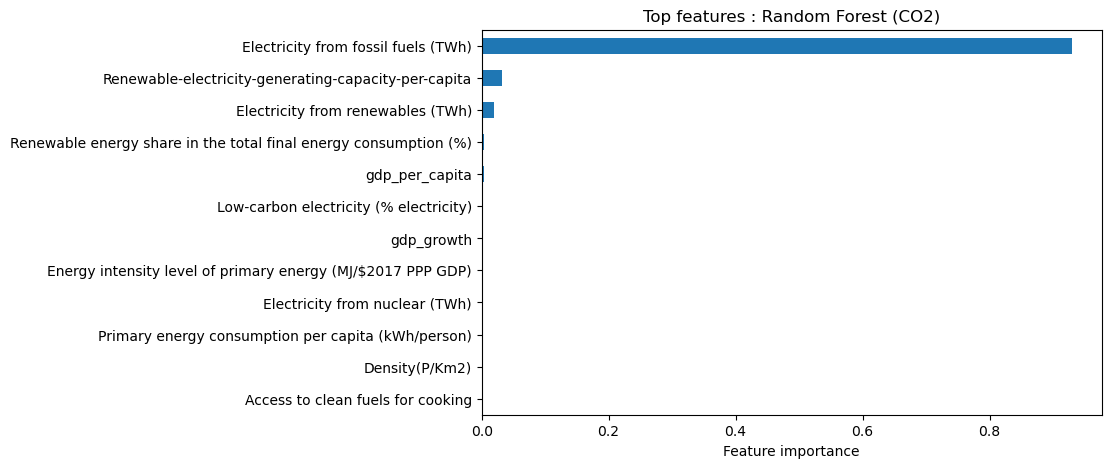

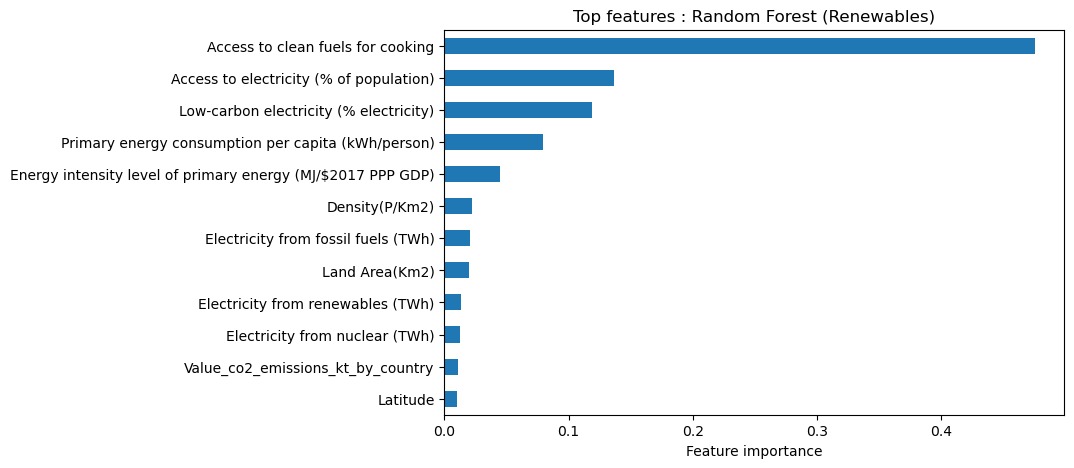

In [43]:
def show_top_features(model, X_train, title, top_n=12):
    fi = pd.Series(model.feature_importances_, index=X_train.columns)
    fi = fi.sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(8,5))
    fi.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Feature importance")
    plt.show()
    return fi

top_co2_feats = show_top_features(rf_co2, Xc_train, "Top features : Random Forest (CO2)")
top_renew_feats = show_top_features(rf_renew, Xr_train, "Top features : Random Forest (Renewables)")

Since both XGBoost and Random Forest struggle with the extreme skewness of CO₂ emissions, the next best approach is to try a model that: handles linear + non-linear patterns. Is more robust on skewed targets.

GBR has less sensitive to outliers than RF, is more stable and smoother than XGBoost, often performs better on medium-sized tabular datasets, and is useful when XGBoost tends to overfit extreme values.

# Model 3: Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

Models

In [46]:
gbr_co2 = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr_renew = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

Training

In [47]:
gbr_co2.fit(Xc_train, yc_train)
gbr_renew.fit(Xr_train, yr_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42,
                          subsample=0.8)

Predict

In [48]:
pred_co2_gbr = gbr_co2.predict(Xc_test)
pred_renew_gbr = gbr_renew.predict(Xr_test)

Evaluation

In [49]:
pred_co2 = evaluate(gbr_co2,Xc_train, yc_train, Xc_test, yc_test, "CO2 Emissions")
pred_renew = evaluate(gbr_renew,Xr_train, yr_train, Xr_test, yr_test, "Renewable Share (%)")

CO2 Emissions Evaluation:
Train -> MAE: 5899.25, RMSE: 9049.73, R²: 0.9998
Test  -> MAE: 31259.63, RMSE: 153330.87, R²: 0.9699

Difference -> ΔMAE: 25360.39, ΔRMSE: 144281.14, ΔR²: 0.0299

Renewable Share (%) Evaluation:
Train -> MAE: 2.37, RMSE: 3.07, R²: 0.9897
Test  -> MAE: 3.87, RMSE: 5.19, R²: 0.9652

Difference -> ΔMAE: 1.50, ΔRMSE: 2.12, ΔR²: 0.0245



In [46]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np

def tune_xgb_hyperparameters(X, y):
    tscv = TimeSeriesSplit(n_splits=5)

    model = XGBRegressor(objective="reg:squarederror", random_state=42)

    param_grid = {        "n_estimators": [200, 400],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1]    }

    grid = GridSearchCV(
        model,
        param_grid,
        cv=tscv,
        scoring="r2",
        verbose=1,
        n_jobs=-1
    )

    grid.fit(X, y)
    

    print("Best parameters:", grid.best_params_)
    print("Best score:", grid.best_score_)

    return grid.best_estimator_


In [50]:
best_xgb_co2 = tune_xgb_hyperparameters(Xc_train, yc_train)
best_xgb_renew = tune_xgb_hyperparameters(Xr_train, yr_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
Best score: 0.5561032269576818
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
Best score: 0.7796609644333807


In [53]:
pred_co2 = evaluate(best_xgb_co2,Xc_train, yc_train, Xc_test, yc_test, "CO2 Emissions")
pred_renew = evaluate(best_xgb_renew,Xr_train, yr_train, Xr_test, yr_test, "Renewable Share (%)")

CO2 Emissions Evaluation:
Train -> MAE: 5368.08, RMSE: 10567.49, R²: 0.9998
Test  -> MAE: 21361.19, RMSE: 118776.08, R²: 0.9820

Difference -> ΔMAE: 15993.11, ΔRMSE: 108208.59, ΔR²: 0.0178

Renewable Share (%) Evaluation:
Train -> MAE: 3.02, RMSE: 3.96, R²: 0.9829
Test  -> MAE: 4.36, RMSE: 5.74, R²: 0.9575

Difference -> ΔMAE: 1.34, ΔRMSE: 1.78, ΔR²: 0.0254



In [43]:
tune_xgb_hyperparameters(Xr_train, yr_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
Best score: 0.7796609644333807


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

# Clustering

Variables utilisées pour le clustering :
['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Primary energy consumption per capita (kWh/person)', 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Renewable-electricity-generating-capacity-per-capita', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_per_capita', 'gdp_growth']

Variance expliquée par les 2 composantes PCA (clustering) :
[0.2918755  0.17716033]


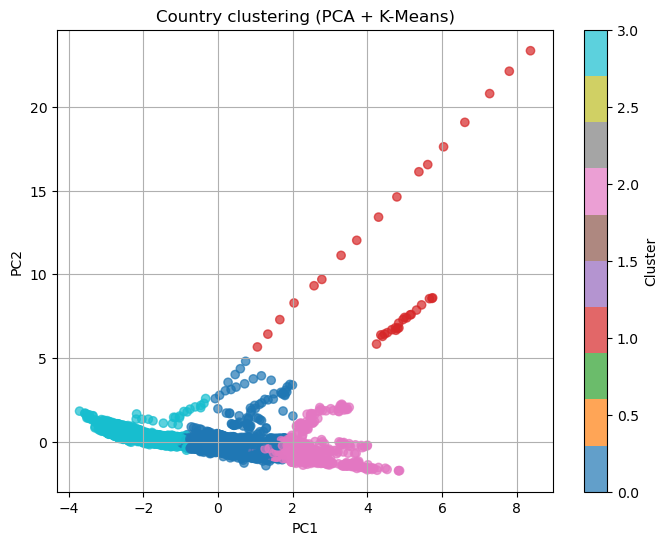


=== Exemples de pays par cluster ===

Cluster 0 (exemples) :
['Afghanistan' 'Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan']

Cluster 1 (exemples) :
['China' 'United States']

Cluster 2 (exemples) :
['Aruba' 'Australia' 'Austria' 'Bahrain' 'Belgium' 'Bermuda' 'Canada'
 'Cayman Islands' 'Denmark' 'Finland']

Cluster 3 (exemples) :
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon']


In [49]:
from sklearn.cluster import KMeans

# 1) Choix des variables pour regrouper les pays
cluster_cols = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Primary energy consumption per capita (kWh/person)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Renewable-electricity-generating-capacity-per-capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'gdp_per_capita',
    'gdp_growth'
]

# On garde seulement les colonnes qui existent vraiment dans le df
cluster_cols = [c for c in cluster_cols if c in df.columns]

print("Variables utilisées pour le clustering :")
print(cluster_cols)

# On crée un sous-dataframe avec Entity + ces variables, et on enlève les lignes avec NaN
df.reset_index()
df_cluster = df[['Entity'] + cluster_cols].dropna().copy()

# 2) Standardisation
X_cluster = df_cluster[cluster_cols]
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# 3) PCA pour visualiser les clusters en 2D
pca_cluster = PCA(n_components=2)
X_cluster_pca = pca_cluster.fit_transform(X_cluster_scaled)

print("\nVariance expliquée par les 2 composantes PCA (clustering) :")
print(pca_cluster.explained_variance_ratio_)

# 4) K-Means (on commence avec 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

df_cluster['Cluster'] = clusters

# 5) Visualisation des clusters dans le plan PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_cluster_pca[:, 0],
    X_cluster_pca[:, 1],
    c=clusters,
    cmap='tab10',
    alpha=0.7
)
plt.title("Country clustering (PCA + K-Means)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

# 6) Exemple : liste des pays par cluster
print("\n=== Exemples de pays par cluster ===")
for k in sorted(df_cluster['Cluster'].unique()):
    countries = df_cluster[df_cluster['Cluster'] == k]['Entity'].unique()[:10]
    print(f"\nCluster {k} (exemples) :")
    print(countries)



# PART 3 : Features selection

### A. PCA

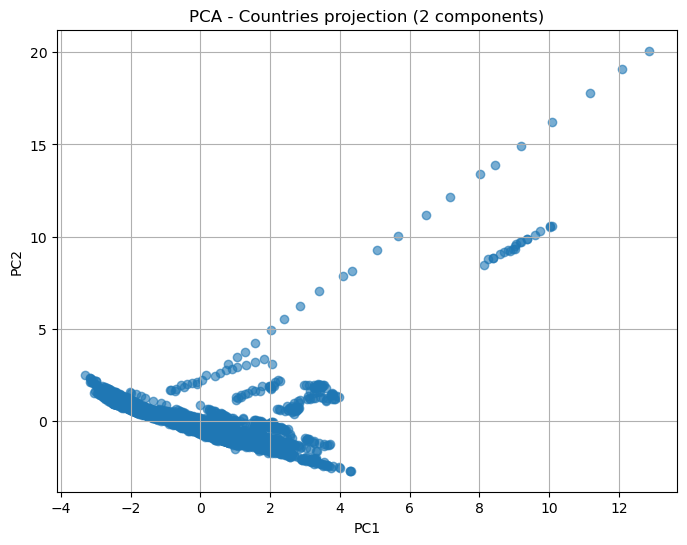

     PC  Variance  % Variance  % Cumulative
0   PC1  3.099111       28.17         28.17
1   PC2  2.079555       18.90         47.07
2   PC3  1.411115       12.82         59.89
3   PC4  1.141103       10.37         70.26
4   PC5  0.994242        9.04         79.30
5   PC6  0.832423        7.57         86.86
6   PC7  0.520554        4.73         91.59
7   PC8  0.445652        4.05         95.64
8   PC9  0.235845        2.14         97.79
9  PC10  0.135038        1.23         99.01


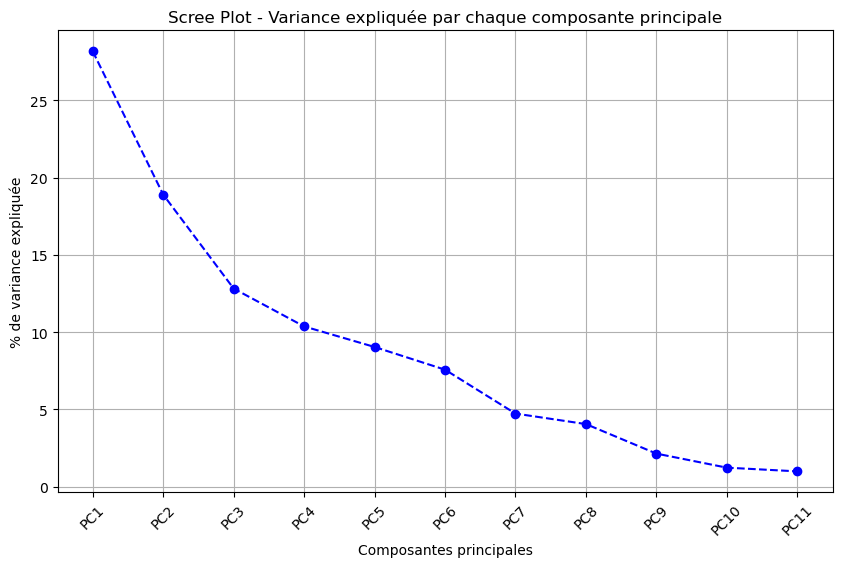

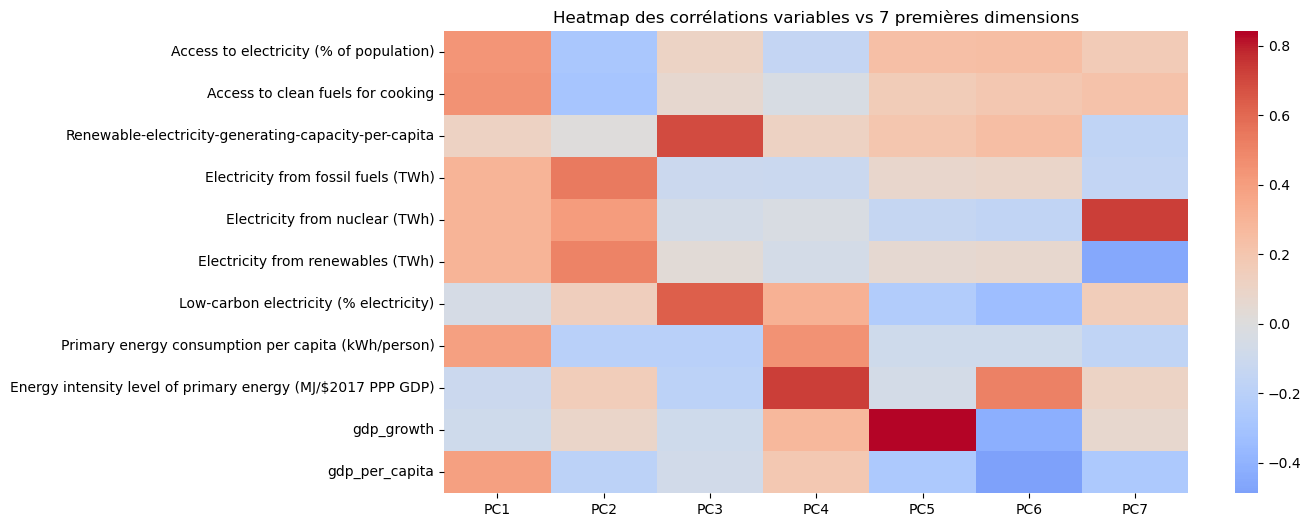

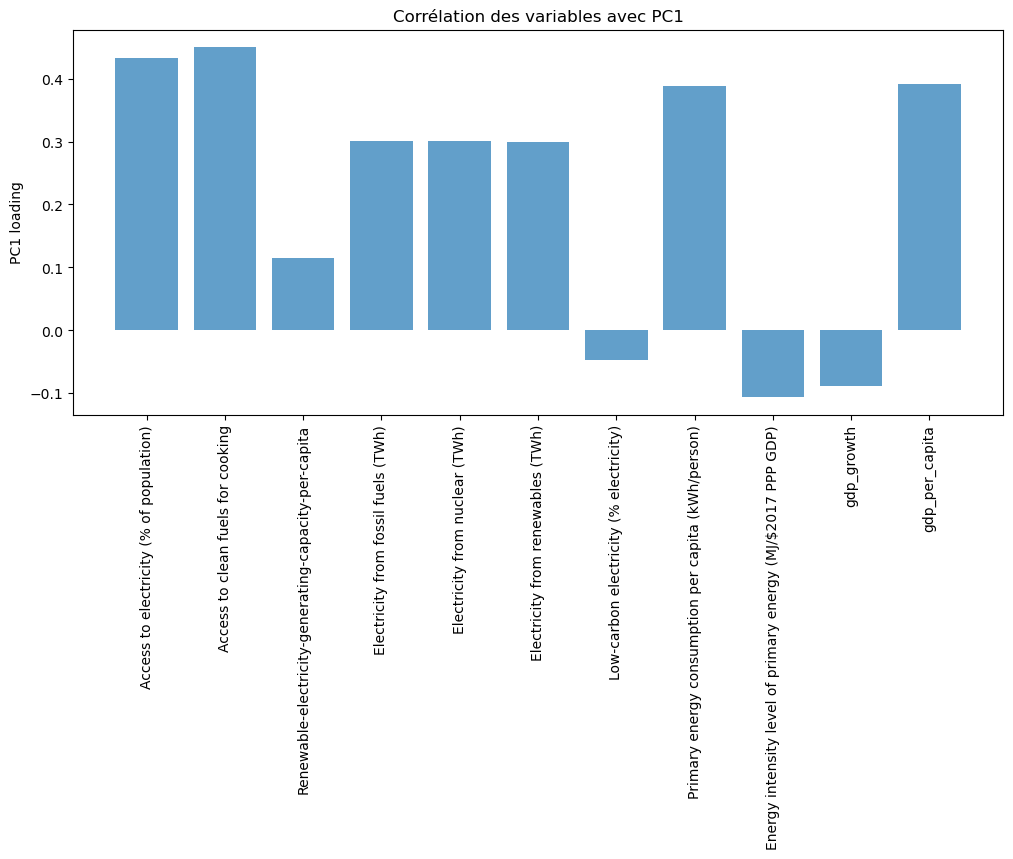

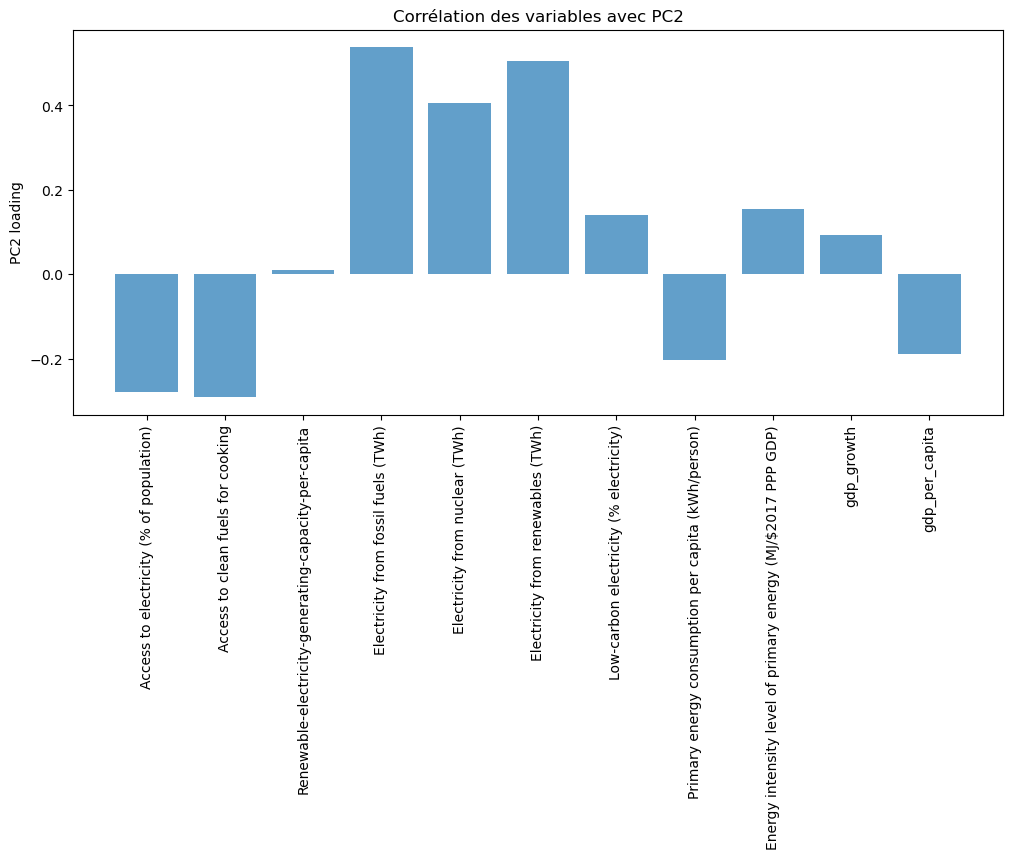

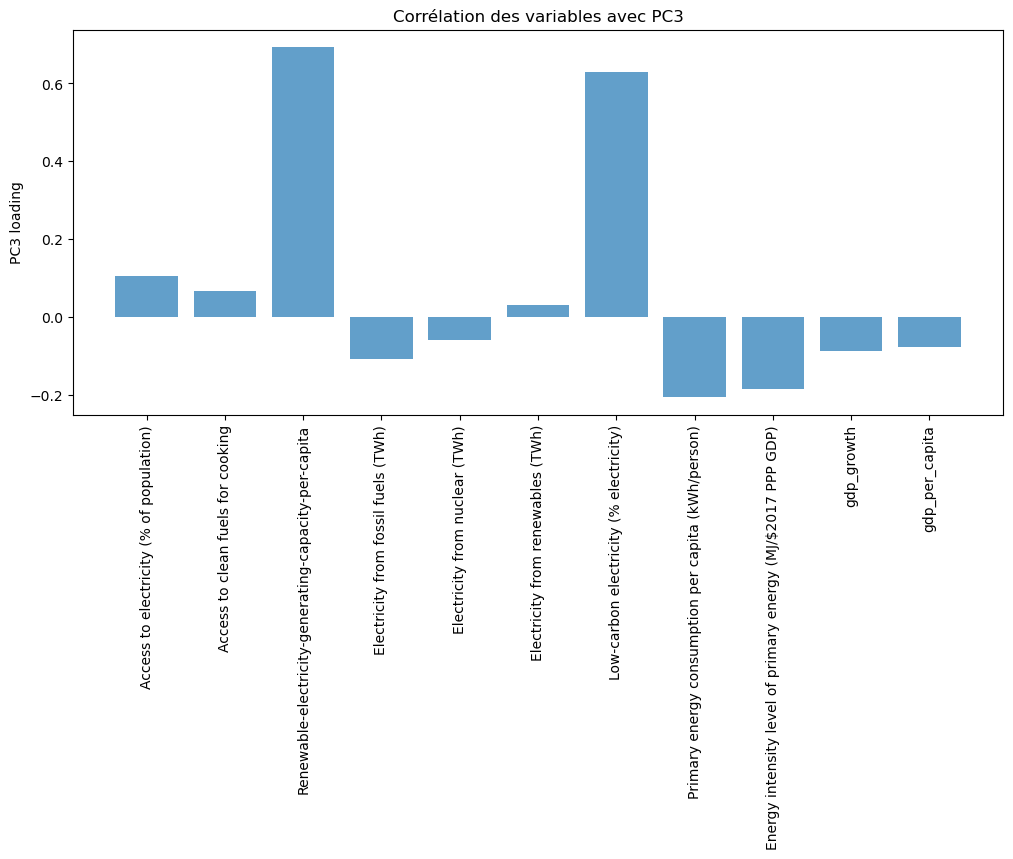

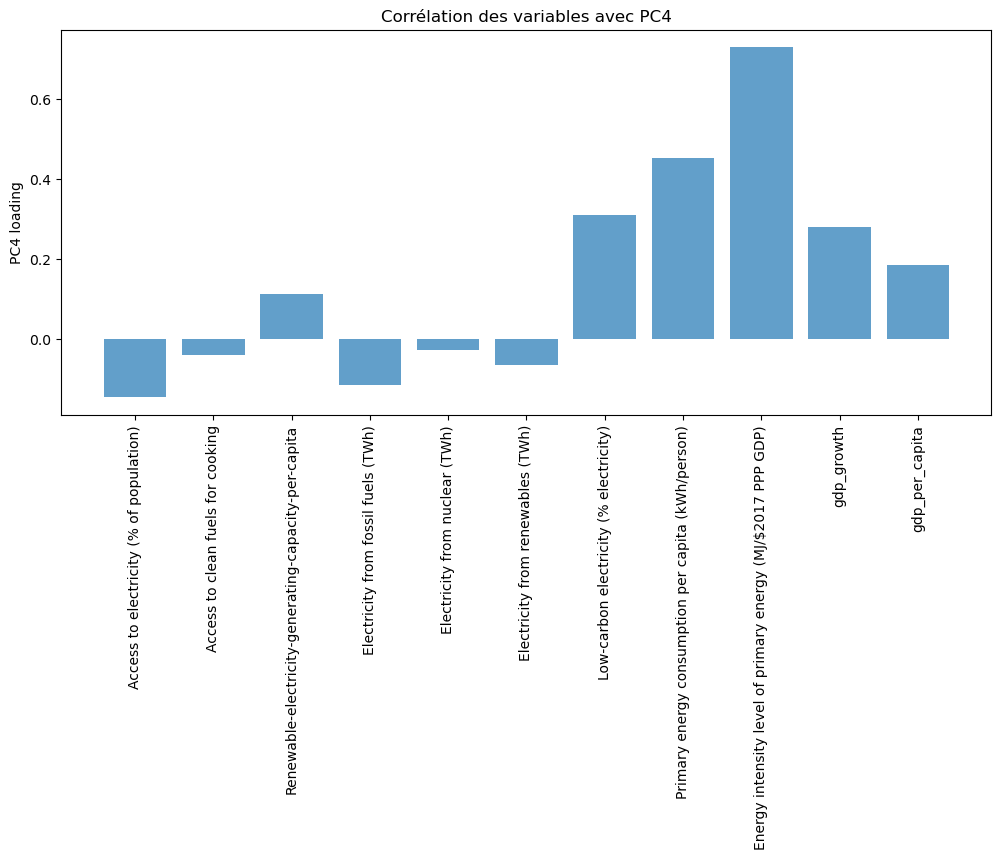

In [50]:
# On prend toutes les variables numériques sauf celles inutiles pour clustering
features_clustering = df.select_dtypes('number').columns.drop(
    ['Year', 'Density(P/Km2)', 'Land Area(Km2)', 'Latitude','Longitude',
     'Value_co2_emissions_kt_by_country',
     'Renewable energy share in the total final energy consumption (%)']
)

X_cluster = df[features_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Entity': df.loc[X_cluster.index, 'Entity'].values
})

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title("PCA - Countries projection (2 components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Variance expliquée
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Variance': pca.explained_variance_,
    '% Variance': np.round(pca.explained_variance_ratio_ * 100, 2),
    '% Cumulative': np.round(np.cumsum(pca.explained_variance_ratio_)*100,2)
})
print(explained_variance.head(10))

# Scree plot
plt.figure(figsize=(10,6))
plt.plot(explained_variance['PC'], explained_variance['% Variance'], marker='o', linestyle='--', color='b')
plt.title("Scree Plot - Variance expliquée par chaque composante principale")
plt.xlabel("Composantes principales")
plt.ylabel("% de variance expliquée")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

n_components_to_show = 7
loadings = pd.DataFrame(pca.components_[:n_components_to_show, :].T,
                        columns=[f'PC{i+1}' for i in range(n_components_to_show)],
                        index=features_clustering)

plt.figure(figsize=(12,6))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title(f'Heatmap des corrélations variables vs {n_components_to_show} premières dimensions')
plt.show()

for i in range(4):
    plt.figure(figsize=(12,5))
    plt.bar(loadings.index, loadings[f'PC{i+1}'], alpha=0.7)
    plt.xticks(rotation=90)
    plt.ylabel(f'PC{i+1} loading')
    plt.title(f'Corrélation des variables avec PC{i+1}')
    plt.show()


We take the 4 first dimensions because we have more than half of the explained cumulative variance, and represent the main structure of the data.

- dim 1 :  Access to electricity, Access to clean fuels for cooking --> PC1 mainly represents the level of development, driven by access to electricity and clean fuels.

- dim2 : Electricity from fossil fuels, electricity from nuclear, electricity from renewable  -->  PC2 captures the energy mix, influenced by fossil, nuclear, and renewable electricity.

- dim 3 : Renewable electricity generationg capacity per capita, low carbon elctricity  -->   PCЗ reflects the renewable energy structure, linked to renewable capacity and low-carbon electricity.

- dim 4 : Primary energy consumption per capita, energy intensity level of primary energy  -->   PC4 describes energy consumption intensity, associated with primary energy consumption and energy intensity.


### B. Correlation

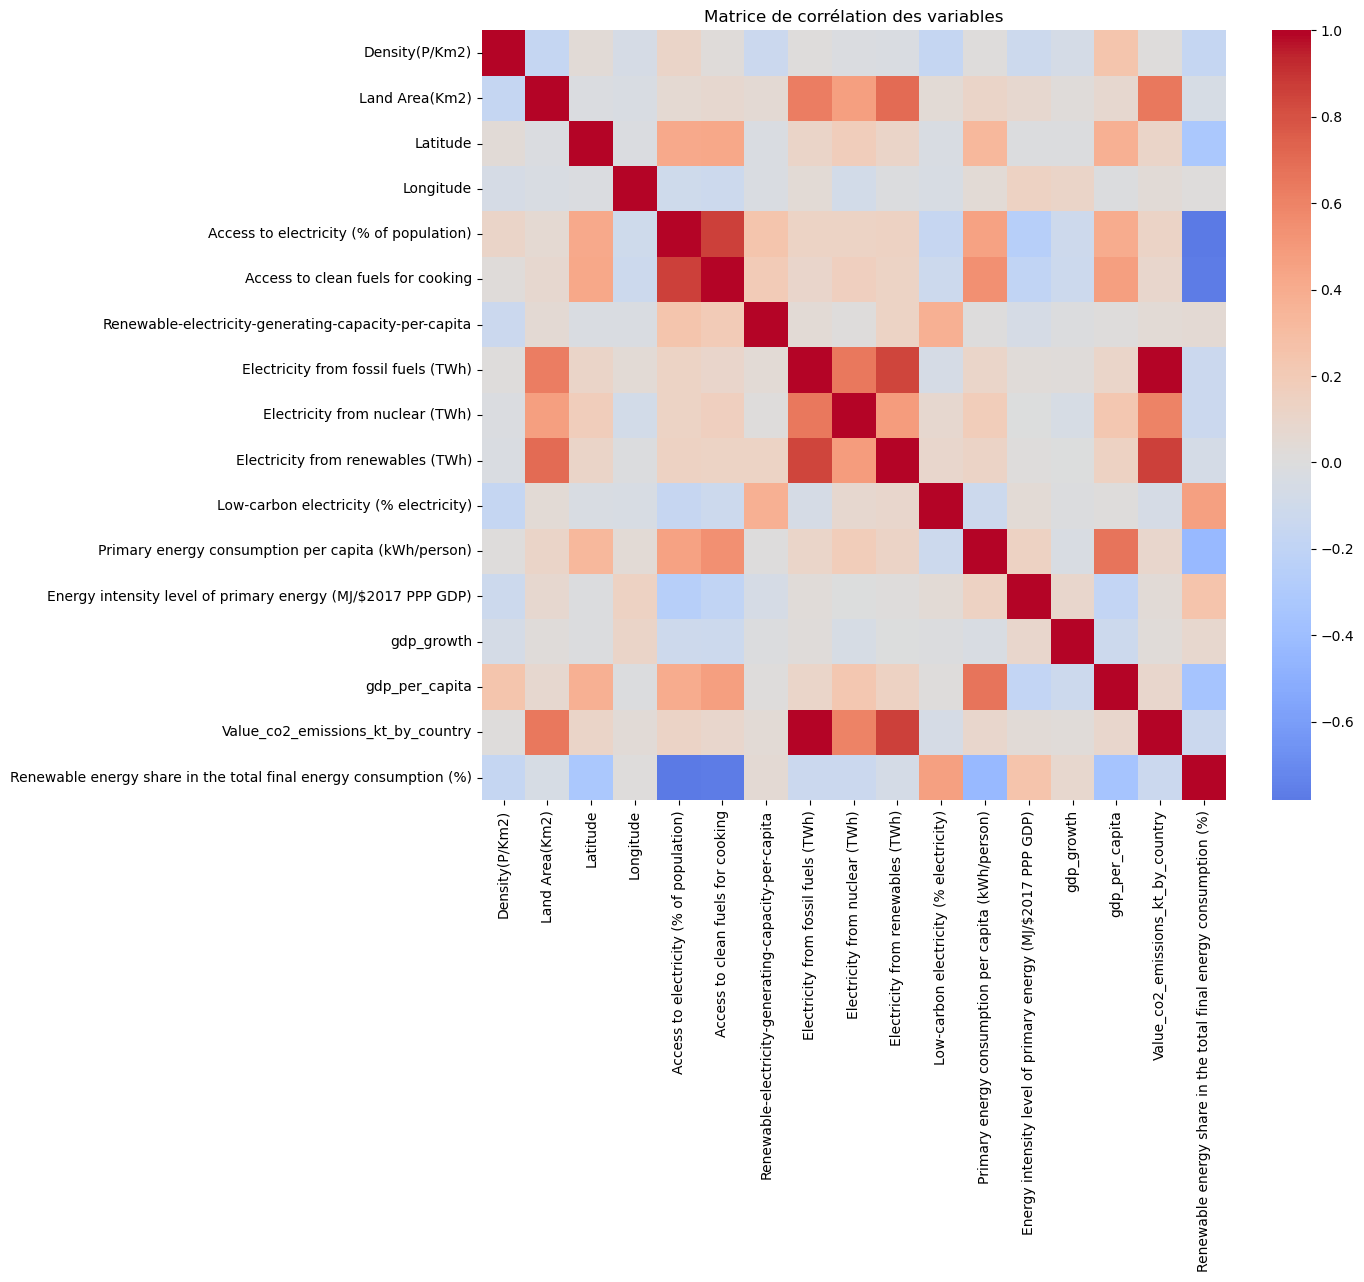

Corrélations avec Value_co2_emissions_kt_by_country :
Value_co2_emissions_kt_by_country                                   1.000000
Electricity from fossil fuels (TWh)                                 0.988606
Electricity from renewables (TWh)                                   0.857006
Land Area(Km2)                                                      0.647993
Electricity from nuclear (TWh)                                      0.602036
Access to electricity (% of population)                             0.122417
Latitude                                                            0.112864
gdp_per_capita                                                      0.094129
Primary energy consumption per capita (kWh/person)                  0.093213
Access to clean fuels for cooking                                   0.092630
Renewable-electricity-generating-capacity-per-capita                0.043004
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.037613
Longitude             

var1  \
98       Electricity from fossil fuels (TWh)   
113        Electricity from renewables (TWh)   
58   Access to electricity (% of population)   
92       Electricity from fossil fuels (TWh)   

                                  var2      corr  
98   Value_co2_emissions_kt_by_country  0.988606  
113  Value_co2_emissions_kt_by_country  0.857006  
58   Access to clean fuels for cooking  0.853879  
92   Electricity from renewables (TWh)  0.845050

In [51]:
corr_matrix = df[X_cols + targets].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables")
plt.show()

for target in targets:
    print(f"Corrélations avec {target} :")
    print(corr_matrix[target].sort_values(ascending=False), "\n")


corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})
)
high_corr = corr_pairs[abs(corr_pairs['corr']) > 0.8].sort_values(by='corr', ascending=False)
print("Paires fortement corrélées (|r| > 0.8) :")
high_corr

The variables the most correlated to Renewable energy share in the total final energy consumption are: Access to clean fuels for cooking (77%) , Access to electricity (78%)

And to Value_co2_emissions_kt_by_country : Electricity from fossil fuels (98%), Electricity from renewables (85%).

variables that are corelated together  [Electricity from fossil fuels, Electricity from renewables] 84%, [ Acces to clean fuels for cooking, Access to electricity] 85%

The pairs of variables corralated together are correlated to the same target variables. We can keep the variable the most correlated to the target. 

So we keep Electricity from fossil fuels for the Value of CO2  and Access to electricity for Renewable energy share.

We get rid of Electricity from renewables and Access to clean fuels for cooking

### C. Lasso

In [52]:
from sklearn.linear_model import LassoCV

#we scale the variable that we didn't before (land area, density) because lasso is very sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [53]:
lasso_co2 = LassoCV(cv=5, random_state=42)
lasso_co2.fit(X_scaled, y_train[target_co2])

selected_features_co2 = X_train.columns[lasso_co2.coef_ != 0].tolist()
print("Features sélectionnées pour CO2 :", selected_features_co2)

Features sélectionnées pour CO2 : ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']


In [54]:
lasso_renew = LassoCV(cv=5, random_state=42)
lasso_renew.fit(X_scaled, y_train[target_renewable])

selected_features_renew = X_train.columns[lasso_renew.coef_ != 0].tolist()
print("Features sélectionnées pour Renewable Energy Share :", selected_features_renew)

Features sélectionnées pour Renewable Energy Share : ['Density(P/Km2)', 'Latitude', 'Longitude', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Electricity from nuclear (TWh)', 'Low-carbon electricity (% electricity)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)']


### D. Forward selection

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
def forward_selection_linear_regression(X_train, y_train, target_col):
    y = y_train[target_col]

    remaining_vars = list(X_train.columns)
    selected_vars = []
    previous_r2 = 0

    r2_list = []
    rmse_list = []
    contrib_list = []
    var_list = []


    while len(remaining_vars) > 0:

        scores = {}

        # tester chaque variable restante
        for var in remaining_vars:
            vars_to_test = selected_vars + [var]
            model = LinearRegression().fit(X_train[vars_to_test], y)
            y_pred = model.predict(X_train[vars_to_test])
            scores[var] = r2_score(y, y_pred)

        # meilleure variable
        best_var = max(scores, key=scores.get)
        best_r2 = scores[best_var]
        contribution = best_r2 - previous_r2

        selected_vars.append(best_var)
        remaining_vars.remove(best_var)
        previous_r2 = best_r2

        # RMSE
        model = LinearRegression().fit(X_train[selected_vars], y)
        y_pred = model.predict(X_train[selected_vars])
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # sauvegarde des résultats
        r2_list.append(best_r2)
        rmse_list.append(rmse)
        contrib_list.append(contribution)
        var_list.append(best_var)


    summary_df = pd.DataFrame({
        'Variable': var_list,
        'R2 cumulatif': r2_list,
        'Contribution marginale': contrib_list,
        'RMSE': rmse_list
    })

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(selected_vars)+1), r2_list, marker='o', label='R²')
    plt.plot(range(1, len(selected_vars)+1), rmse_list, marker='x', label='RMSE')
    plt.xticks(range(1, len(selected_vars)+1), var_list, rotation=90)
    plt.xlabel('Variables ajoutées')
    plt.ylabel('Score')
    plt.title(f"Forward Selection – {target_col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return summary_df


C:\Users\marin\AppData\Local\Temp\ipykernel_10708\4284147031.py:61: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



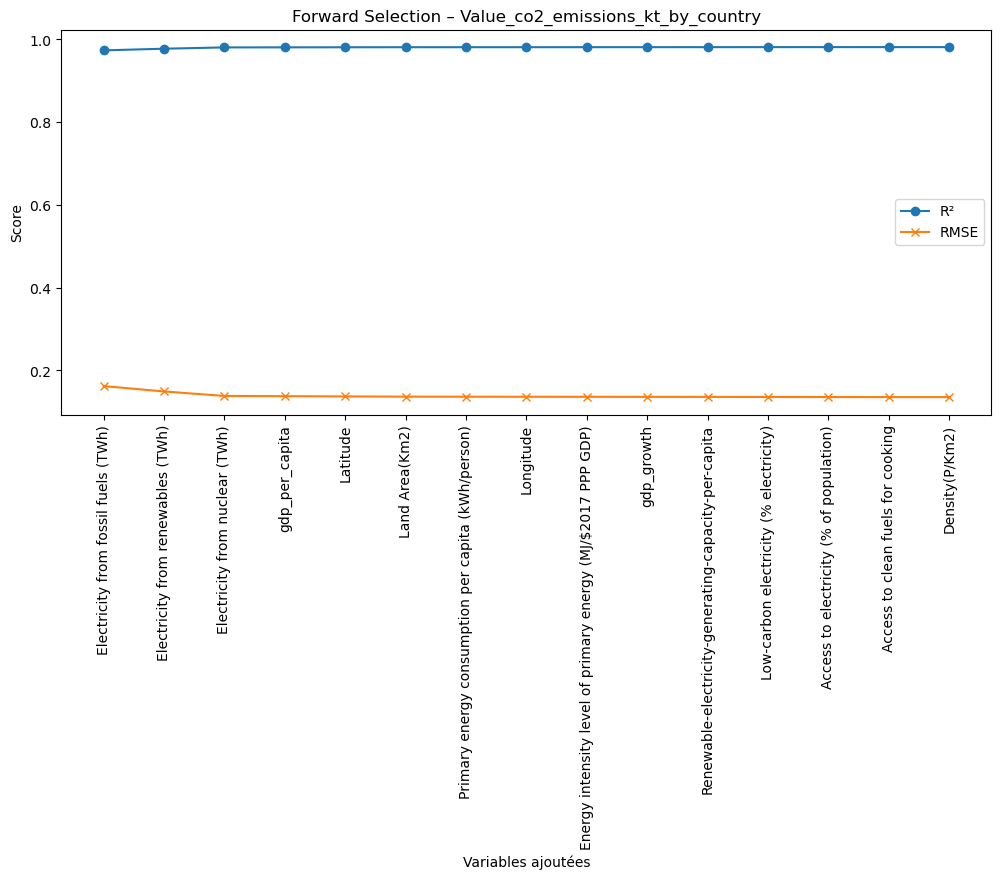

Variable  R2 cumulatif  \
0                 Electricity from fossil fuels (TWh)      0.973690   
1                   Electricity from renewables (TWh)      0.977724   
2                      Electricity from nuclear (TWh)      0.980853   
3                                      gdp_per_capita      0.980993   
4                                            Latitude      0.981169   
5                                      Land Area(Km2)      0.981312   
6   Primary energy consumption per capita (kWh/per...      0.981352   
7                                           Longitude      0.981384   
8   Energy intensity level of primary energy (MJ/$...      0.981426   
9                                          gdp_growth      0.981455   
10  Renewable-electricity-generating-capacity-per-...      0.981478   
11             Low-carbon electricity (% electricity)      0.981526   
12            Access to electricity (% of population)      0.981568   
13                  Access to clean fuels for cooking      0.981604   
14                                     Density(P/Km2)      0.981604   

    Contribution marginale      RMSE  
0             9.736902e-01  0.162203  
1             4.033549e-03  0.149252  
2             3.128751e-03  0.138374  
3             1.401204e-04  0.137867  
4             1.766363e-04  0.137225  
5             1.430631e-04  0.136703  
6             3.973290e-05  0.136557  
7             3.229111e-05  0.136439  
8             4.164106e-05  0.136287  
9             2.890081e-05  0.136180  
10            2.358865e-05  0.136094  
11            4.790246e-05  0.135918  
12            4.160600e-05  0.135765  
13            3.615041e-05  0.135631  
14            2.952061e-07  0.135630

In [57]:
forward_selection_linear_regression(X_train, y_train, target_co2)

CO2 most important variables: Electricity from fossil fuels, Electricity from renewables, Electricity from nuclear 

Very high cumulative R² (98%), low RMSE on trains → these variables almost entirely explain the variance in CO2.


C:\Users\marin\AppData\Local\Temp\ipykernel_10708\4284147031.py:61: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



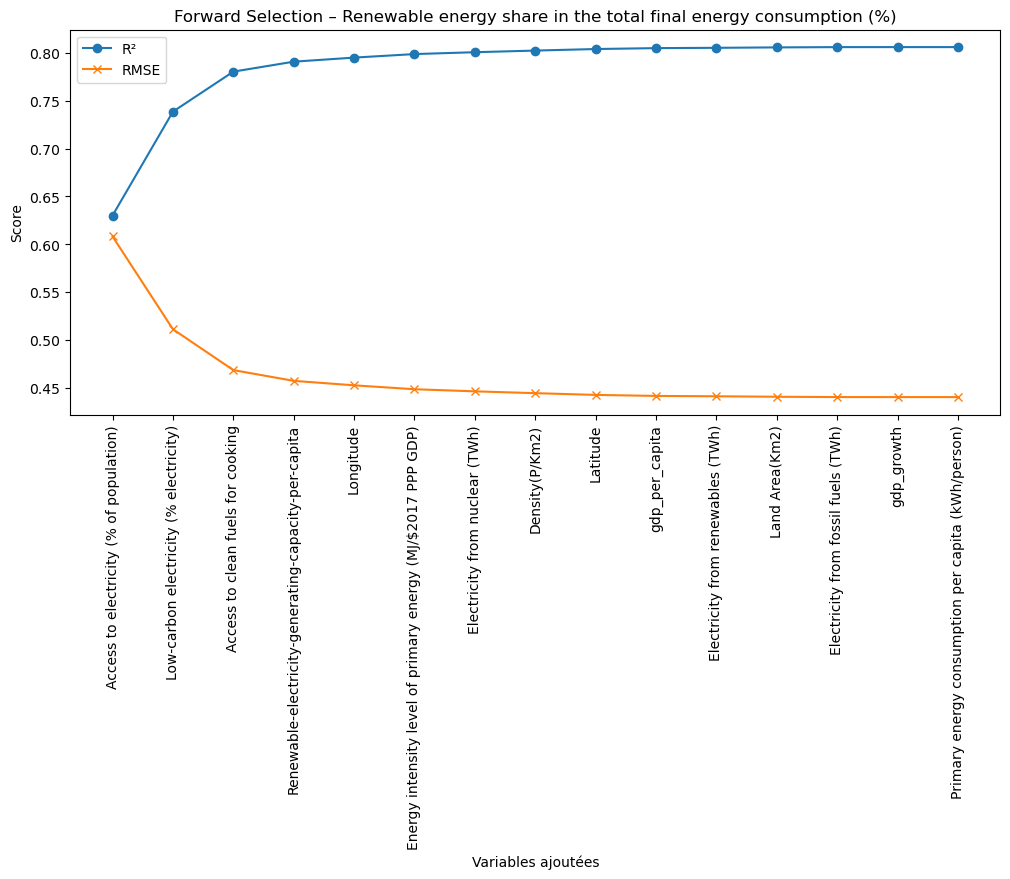

Variable  R2 cumulatif  \
0             Access to electricity (% of population)      0.630092   
1              Low-carbon electricity (% electricity)      0.738730   
2                   Access to clean fuels for cooking      0.780559   
3   Renewable-electricity-generating-capacity-per-...      0.790973   
4                                           Longitude      0.795233   
5   Energy intensity level of primary energy (MJ/$...      0.798926   
6                      Electricity from nuclear (TWh)      0.800876   
7                                      Density(P/Km2)      0.802585   
8                                            Latitude      0.804202   
9                                      gdp_per_capita      0.805139   
10                  Electricity from renewables (TWh)      0.805472   
11                                     Land Area(Km2)      0.805911   
12                Electricity from fossil fuels (TWh)      0.806192   
13                                         gdp_growth      0.806221   
14  Primary energy consumption per capita (kWh/per...      0.806222   

    Contribution marginale      RMSE  
0             6.300917e-01  0.608201  
1             1.086386e-01  0.511145  
2             4.182852e-02  0.468445  
3             1.041414e-02  0.457195  
4             4.260186e-03  0.452512  
5             3.693269e-03  0.448412  
6             1.949294e-03  0.446233  
7             1.709550e-03  0.444314  
8             1.617085e-03  0.442490  
9             9.362817e-04  0.441431  
10            3.331923e-04  0.441053  
11            4.390494e-04  0.440555  
12            2.811861e-04  0.440236  
13            2.921179e-05  0.440203  
14            4.586272e-07  0.440202

In [58]:
forward_selection_linear_regression(X_train, y_train, target_renewable)

Renewable Energy Share most important variables: Access to electricity, Low-carbon electricity , Access to clean fuels for cooking (R² =  78% )


Overall, lower cumulative R² (80%) → more variables influence the share of renewable energy, but the first three already capture the majority of the effect.


We can add Renewable-electricity-generating-capacity-per-person, Longitude, Energy intensity level of primary energy and 	Electricity from nuclear to atteign 80%

#### Summary of the features selection

**CO2** : 
- Lasso and forward selction same variables : Electricity from fossil fuels, Electricity from renewables, Electricity from nuclear 
- Correlation:Electricity from fossil fuels and Electricity from nuclear might be repetitive (84% correlation)

**Renewable** : 
- Lasso : Density(P/Km2), Latitude, Longitude, Access to electricity, Access to clean fuels for cooking, Renewable-electricity-generating-capacity-per-capita, Electricity from nuclear, Low-carbon electricity, Energy intensity level of primary energy 

- forward sleection : Access to electricity, Low-carbon electricity , Access to clean fuels for cooking

- Correlation :Access to electricity and Access to clean fuels for cooking might be repetitive (85% correlation)

--> lasso and foward selection are very similar. lasso just have more features, but we can see in the forward selection that those features don't add on. We will try to add Renewable-electricity-generating-capacity-per-capita, which is the next important variable in the forward selction to see if those features can be rid of

In [18]:
features_co2_simple = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)']
features_co2_corr = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']

features_renewable_simple = ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)',
                             'Access to clean fuels for cooking']
features_renewable_corr = ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)']
features_renewable_fs7 = ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)',
                          'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita']

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def test_model(X_train, y_train, X_test, y_test, features, target):
    model = LinearRegression()
    model.fit(X_train[features], y_train[target])
    y_pred = model.predict(X_test[features])
    
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    
    print(f"Target: {target}, Features: {features}")
    print(f"R²: {r2:.4f}, RMSE: {mse**0.5:.4f}\n")
    
    return model


In [61]:
# Renewable
test_model(X_train, y_train, X_test, y_test, features_renewable_simple, target_renewable)
test_model(X_train, y_train, X_test, y_test, features_renewable_corr, target_renewable)
test_model(X_train, y_train, X_test, y_test, features_renewable_fs7, target_renewable)

Target: Renewable energy share in the total final energy consumption (%), Features: ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking']
R²: 0.7277, RMSE: 0.4801

Target: Renewable energy share in the total final energy consumption (%), Features: ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)']
R²: 0.6652, RMSE: 0.5323

Target: Renewable energy share in the total final energy consumption (%), Features: ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita']
R²: 0.7367, RMSE: 0.4720



LinearRegression()

Access to clean fuels is important for the model as we observe alowerinf of 6% without it. 
On the contrary Renewable-electricity-generating-capacity-per-capita only add 1 percent. We conclude adding other variables isn't favorable.

In [19]:
#Final features for both target
features_co2 = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']
features_renewable = ['Access to electricity (% of population)', 'Low-carbon electricity (% electricity)','Access to clean fuels for cooking']

df_co2 = df[['Entity', 'Year','Value_co2_emissions_kt_by_country' ] +features_co2 ].copy()
df_renew = df[['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)'] +features_renewable].copy()

# Part 5 : Advances algorithms for forcasting

## A. XGBoost forecasting

### Model test

In [61]:
def xgb_forecast_panel(df, target, id_col="Entity", time_col="Year", n_lags=3, rolling_windows=[3], split_year=2016, sample_countries=6, seed=42):
   
    np.random.seed(seed)
    random.seed(seed)
    
    #data prep
    df_ts = df[[id_col, time_col, target]].copy()
    
    # numeric columns
    numeric_others = [c for c in df.select_dtypes('number').columns if c not in [time_col, target]]
    
    base_predictors = numeric_others
    df_ts = df[[id_col, time_col, target] + base_predictors].copy()
    
    df_ts = df_ts.sort_values([id_col, time_col]).reset_index(drop=True)
    
    # Lags and rolling features
    for lag in range(1, n_lags+1):
        df_ts[f'{target}_lag{lag}'] = df_ts.groupby(id_col)[target].shift(lag)
    for w in rolling_windows:
        df_ts[f'{target}_rollmean_{w}'] = df_ts.groupby(id_col)[target].shift(1).rolling(window=w, min_periods=1).mean().reset_index(level=0, drop=True)
    
    # key features lags
    for col in ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Access to electricity (% of population)']:
        if col in df_ts.columns:
            df_ts[f'{col}_lag1'] = df_ts.groupby(id_col)[col].shift(1)
    
    # Year numeric features
    df_ts['year_num'] = df_ts[time_col].astype(int)
    df_ts['year_diff'] = df_ts['year_num'] - df_ts['year_num'].min()
    
    # Drop NA
    df_model = df_ts.dropna().reset_index(drop=True)
    
    print(f"After lagging: {df_model.shape[0]} rows, {df_model.shape[1]} columns")
    
    #train test split
    train_df = df_model[df_model[time_col] <= split_year].copy()
    test_df  = df_model[df_model[time_col] > split_year].copy()
    
    print("Train years:", sorted(train_df[time_col].unique())[0], "->", sorted(train_df[time_col].unique())[-1])
    print("Test  years:", sorted(test_df[time_col].unique())[0], "->", sorted(test_df[time_col].unique())[-1])
    print("Train shape:", train_df.shape, "Test shape:", test_df.shape)
    
    # feature list
    exclude = [id_col, time_col, target]
    features = [c for c in train_df.columns if c not in exclude]
    
    X_train = train_df[features]
    y_train = train_df[target]
    X_test  = test_df[features]
    y_test  = test_df[target]
    
    # train xgboost  
    xgb_params = {
        'n_estimators': 500,
        'learning_rate': 0.05,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': seed,
        'verbosity': 0,
        'n_jobs': -1
    }
    
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    
    #prediction and evaluation
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2
    
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    
    mae_tr, rmse_tr, r2_tr = evaluate(y_train, y_pred_train)
    mae_te, rmse_te, r2_te = evaluate(y_test, y_pred_test)
    
    print("\nModel evaluation:")
    print(f"Train -> MAE: {mae_tr:.2f}, RMSE: {rmse_tr:.2f}, R²: {r2_tr:.4f}")
    print(f"Test  -> MAE: {mae_te:.2f}, RMSE: {rmse_te:.2f}, R²: {r2_te:.4f}")
    print(f"Difference -> ΔMAE: {mae_te-mae_tr:.2f}, ΔRMSE: {rmse_te-rmse_tr:.2f}, ΔR²: {r2_tr-r2_te:.4f}")
    
    # gobal plot
    plot_df = test_df[[id_col, time_col, target]].copy()
    plot_df['y_pred'] = y_pred_test
    plot_df = plot_df.sort_values([time_col, id_col])
    
    train_agg = train_df.groupby(time_col)[target].sum()
    test_agg = plot_df.groupby(time_col)[target].sum()
    pred_agg = plot_df.groupby(time_col)['y_pred'].sum()
    
    plt.figure(figsize=(12,6))
    plt.plot(train_agg.index, train_agg.values, marker="o", label=f"Train 2000–{split_year}")
    plt.plot(test_agg.index, test_agg.values, marker="s", label=f"Test {split_year+1}–{max(test_df[time_col])}")
    plt.plot(pred_agg.index, pred_agg.values, marker="x", linestyle="--", label="Predicted test")
    plt.title(f"{target} — Global True vs Predicted")
    plt.xlabel("Year")
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #grpah for random coutries
    sample_countries_list = random.sample(list(test_df[id_col].unique()), min(sample_countries, len(test_df[id_col].unique())))
    n = len(sample_countries_list)
    plt.figure(figsize=(15, 3*n))
    for i, country in enumerate(sample_countries_list):
        plt.subplot(n,1,i+1)
        cdf_train = train_df[train_df[id_col]==country].sort_values(time_col)
        cdf_test  = test_df[test_df[id_col]==country].sort_values(time_col)
        plt.plot(cdf_train[time_col], cdf_train[target], label="Train True", marker="o")
        plt.plot(cdf_test[time_col], cdf_test[target], label="Test True", marker="s")
        plt.plot(cdf_test[time_col], y_pred_test[test_df[id_col]==country], label="Pred Test", marker="x")
        plt.title(country)
        plt.xlabel("Year")
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return model, df_model, y_pred_train, y_pred_test


After lagging: 3118 rows, 13 columns
Train years: 2003 -> 2016
Test  years: 2017 -> 2020
Train shape: (2422, 13) Test shape: (696, 13)

Model evaluation:
Train -> MAE: 687.43, RMSE: 1145.94, R²: 1.0000
Test  -> MAE: 19830.13, RMSE: 129335.70, R²: 0.9790
Difference -> ΔMAE: 19142.70, ΔRMSE: 128189.76, ΔR²: 0.0210


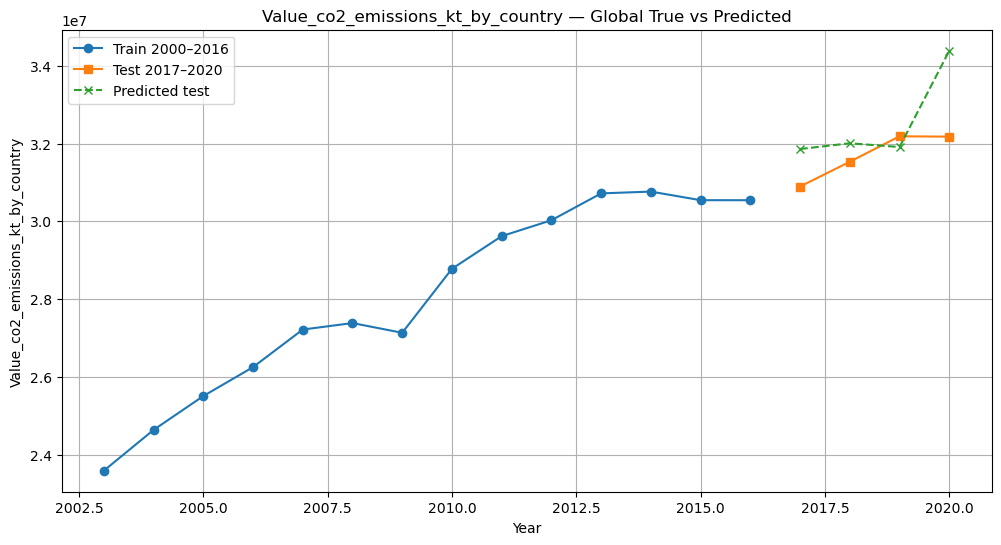

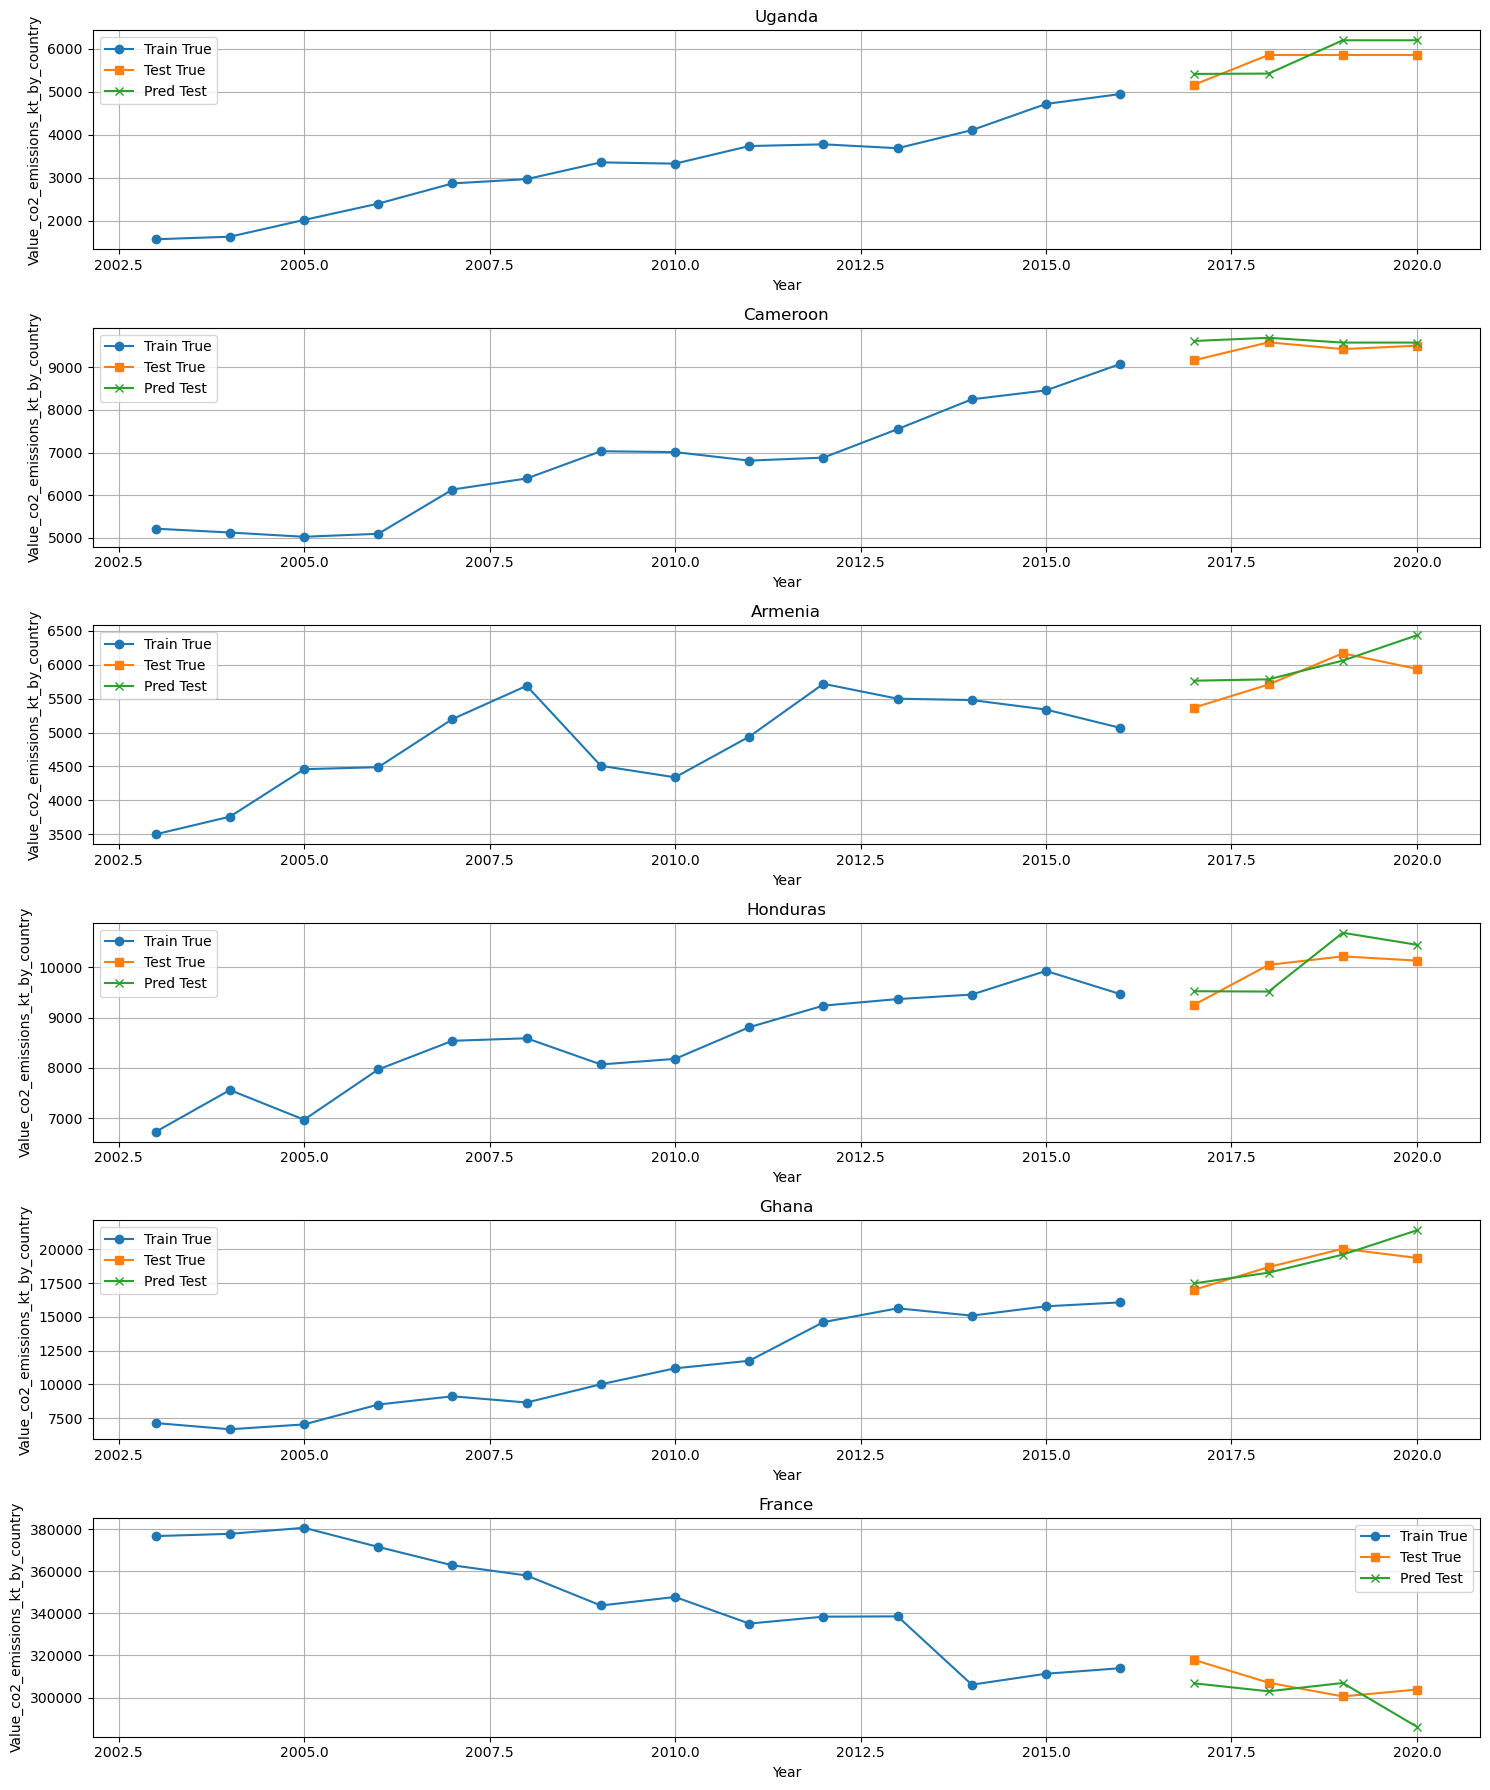

In [62]:
model_co2, df_model_co2, y_train_pred, y_test_pred = xgb_forecast_panel(
    df=df_co2,
    target="Value_co2_emissions_kt_by_country",
    split_year=2016
)

High scores, no significant overfitting (R² train > R² test).
Global model does not represent trends well; better to analyze country by country.

After lagging: 3118 rows, 13 columns
Train years: 2003 -> 2016
Test  years: 2017 -> 2020
Train shape: (2422, 13) Test shape: (696, 13)

Model evaluation:
Train -> MAE: 0.33, RMSE: 0.47, R²: 0.9998
Test  -> MAE: 1.23, RMSE: 1.89, R²: 0.9954
Difference -> ΔMAE: 0.90, ΔRMSE: 1.43, ΔR²: 0.0044


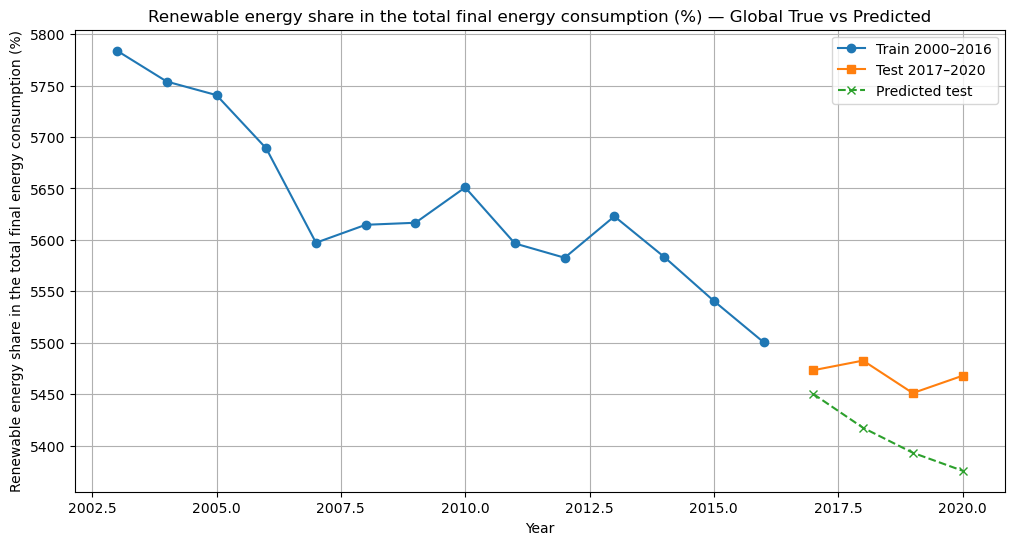

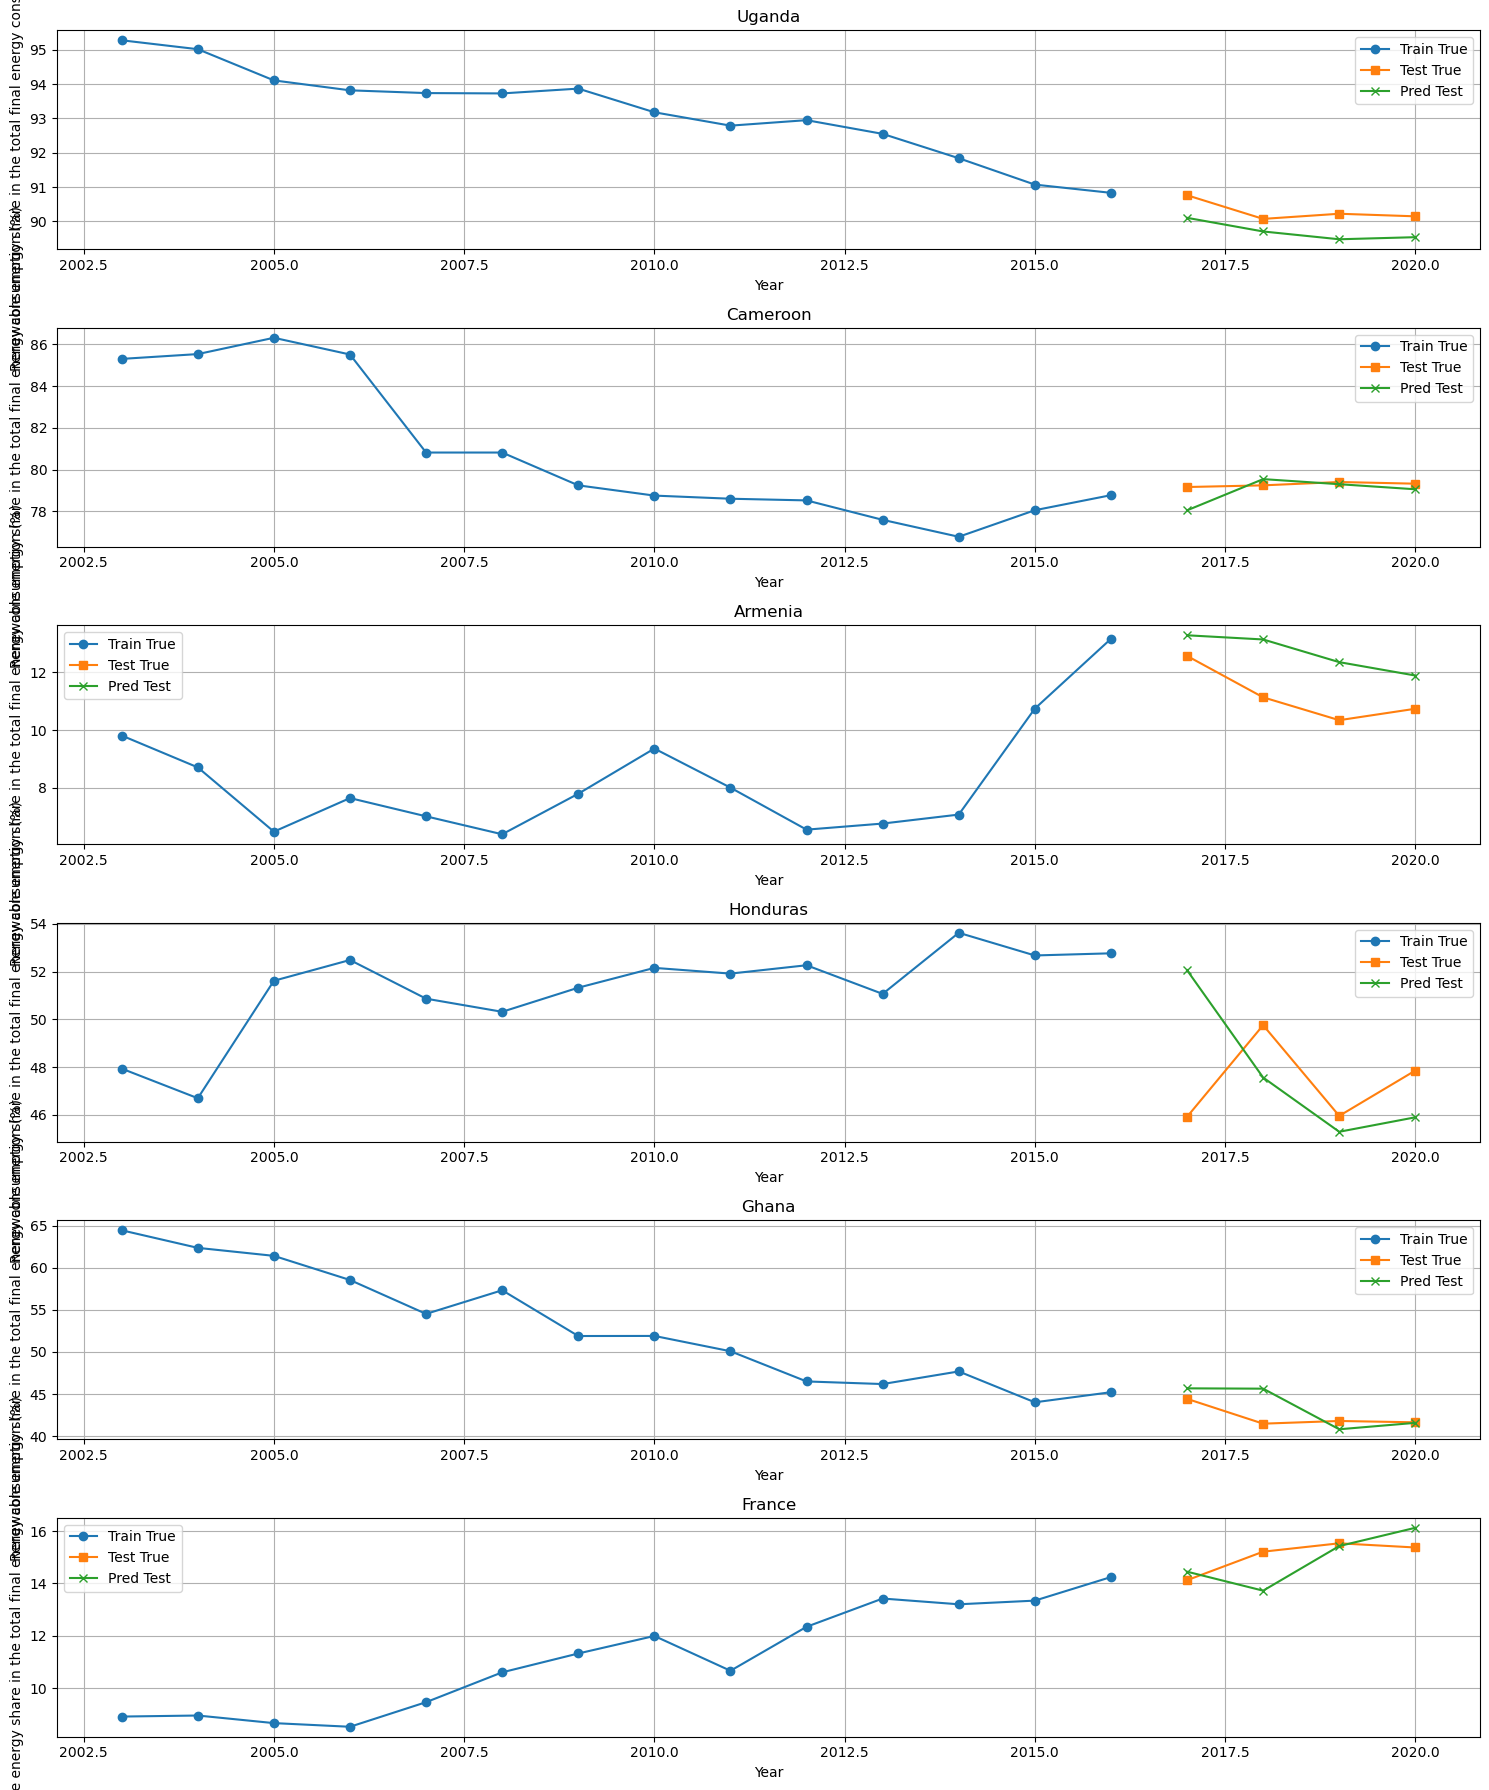

In [63]:
model_renew, df_model_renew, y_train_pred_r, y_test_pred_r = xgb_forecast_panel(
    df=df_renew,
    target="Renewable energy share in the total final energy consumption (%)",
    split_year=2016
)

Again the model is better country by country

### Future predictions

In [77]:
def xgb_forecast_future(df, target, id_col="Entity", time_col="Year", n_lags=3, rolling_windows=[3], start_year=2021, end_year=2026, sample_countries=6, seed=42):
    
    np.random.seed(seed)
    random.seed(seed)
    
    #data prep
    df_ts = df[[id_col, time_col, target]].copy()
    numeric_others = [c for c in df.select_dtypes('number').columns if c not in [time_col, target]]
    base_predictors = numeric_others
    df_ts = df[[id_col, time_col, target] + base_predictors].copy()
    df_ts = df_ts.sort_values([id_col, time_col]).reset_index(drop=True)
    
    # Lags and rolling features
    for lag in range(1, n_lags+1):
        df_ts[f'{target}_lag{lag}'] = df_ts.groupby(id_col)[target].shift(lag)
    for w in rolling_windows:
        df_ts[f'{target}_rollmean_{w}'] = df_ts.groupby(id_col)[target].shift(1).rolling(window=w, min_periods=1).mean().reset_index(level=0, drop=True)
    
    # Lags on key features
    for col in ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Access to electricity (% of population)']:
        if col in df_ts.columns:
            df_ts[f'{col}_lag1'] = df_ts.groupby(id_col)[col].shift(1)
    
    df_ts['year_num'] = df_ts[time_col].astype(int)
    df_ts['year_diff'] = df_ts['year_num'] - df_ts['year_num'].min()
    df_model = df_ts.dropna().reset_index(drop=True)
    
    features = [c for c in df_model.columns if c not in [id_col, time_col, target]]
    
    # loop on coutries
    countries = df_model[id_col].unique()
    all_forecasts = []
    
    for country in countries:
        df_country = df_model[df_model[id_col]==country].copy()
        
        # Train XGBoost on data
        X_train = df_country[features]
        y_train = df_country[target]
        model = XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=seed,
            verbosity=0,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        # predict future year
        future_rows = []
        last_rows = df_country.sort_values(time_col).iloc[-n_lags:].copy()
        
        for year in range(start_year, end_year+1):
            row = {}
            row[id_col] = country
            row[time_col] = year
            
            # Lags of target
            for lag in range(1, n_lags+1):
                if lag <= len(last_rows):
                    row[f'{target}_lag{lag}'] = last_rows[target].iloc[-lag]
                else:
                    row[f'{target}_lag{lag}'] = last_rows[target].iloc[0]
            
            # Rolling
            for w in rolling_windows:
                row[f'{target}_rollmean_{w}'] = last_rows[target].iloc[-w:].mean()
            
            # Lags of features
            for col in ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
                        'Access to electricity (% of population)', 'Low-carbon electricity (% electricity)',
                        
                        'Access to clean fuels for cooking']:
                if col in df_country.columns:
                    row[f'{col}_lag1'] = last_rows[col].iloc[-1]
                    row[col] = last_rows[col].iloc[-1]
            
            # Year numeric
            row['year_num'] = year
            row['year_diff'] = year - df_country[time_col].min()
            
            # dataframe prep and predict
            X_row = pd.DataFrame([row])[features]
            row[target + "_pred"] = model.predict(X_row)[0]
            future_rows.append(row)
            
            # Last rows update for next year
            new_row = pd.DataFrame([row])[ [time_col] + [f'{target}_lag{l}' for l in range(1,n_lags+1)] ]
            new_row[target] = row[target + "_pred"]

            last_rows = pd.concat([last_rows, new_row], ignore_index=True)
        
        all_forecasts.append(pd.DataFrame(future_rows))
    
    forecast_df = pd.concat(all_forecasts).reset_index(drop=True)
    
    #global graph
    plt.figure(figsize=(12,6))
    
    past_global = df_model.groupby(time_col)[target].sum()
    plt.plot(past_global.index, past_global.values, marker="o", label=f"Valeurs réelles 2000–{df_model[time_col].max()}")
    
    future_global = forecast_df.groupby(time_col)[target+"_pred"].sum()
    plt.plot(future_global.index, future_global.values, marker="x", linestyle="--", label=f"Prédiction {start_year}-{end_year}")
    
    plt.title(f"{target} — Global forecast 2000–{end_year}")
    plt.xlabel("Year")
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #graph for random countries
    sample_countries_list = random.sample(list(countries), min(sample_countries, len(countries)))
    plt.figure(figsize=(15, 3*len(sample_countries_list)))
    
    for i, c in enumerate(sample_countries_list):
        plt.subplot(len(sample_countries_list),1,i+1)
        past = df_model[df_model[id_col]==c].sort_values(time_col)
        future = forecast_df[forecast_df[id_col]==c].sort_values(time_col)
        plt.plot(past[time_col], past[target], marker="o", label="Réel")
        plt.plot(future[time_col], future[target+"_pred"], marker="x", linestyle="--", label="Prédiction future")
        plt.title(c)
        plt.xlabel("Year")
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return forecast_df


Global trend shows an increase in CO₂ emissions, but the model does not account for local or international policies.

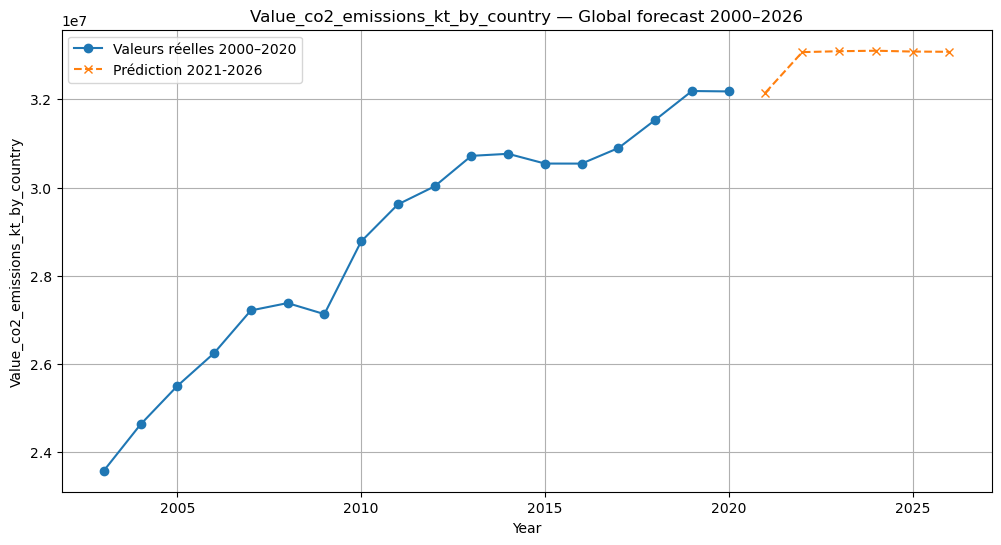

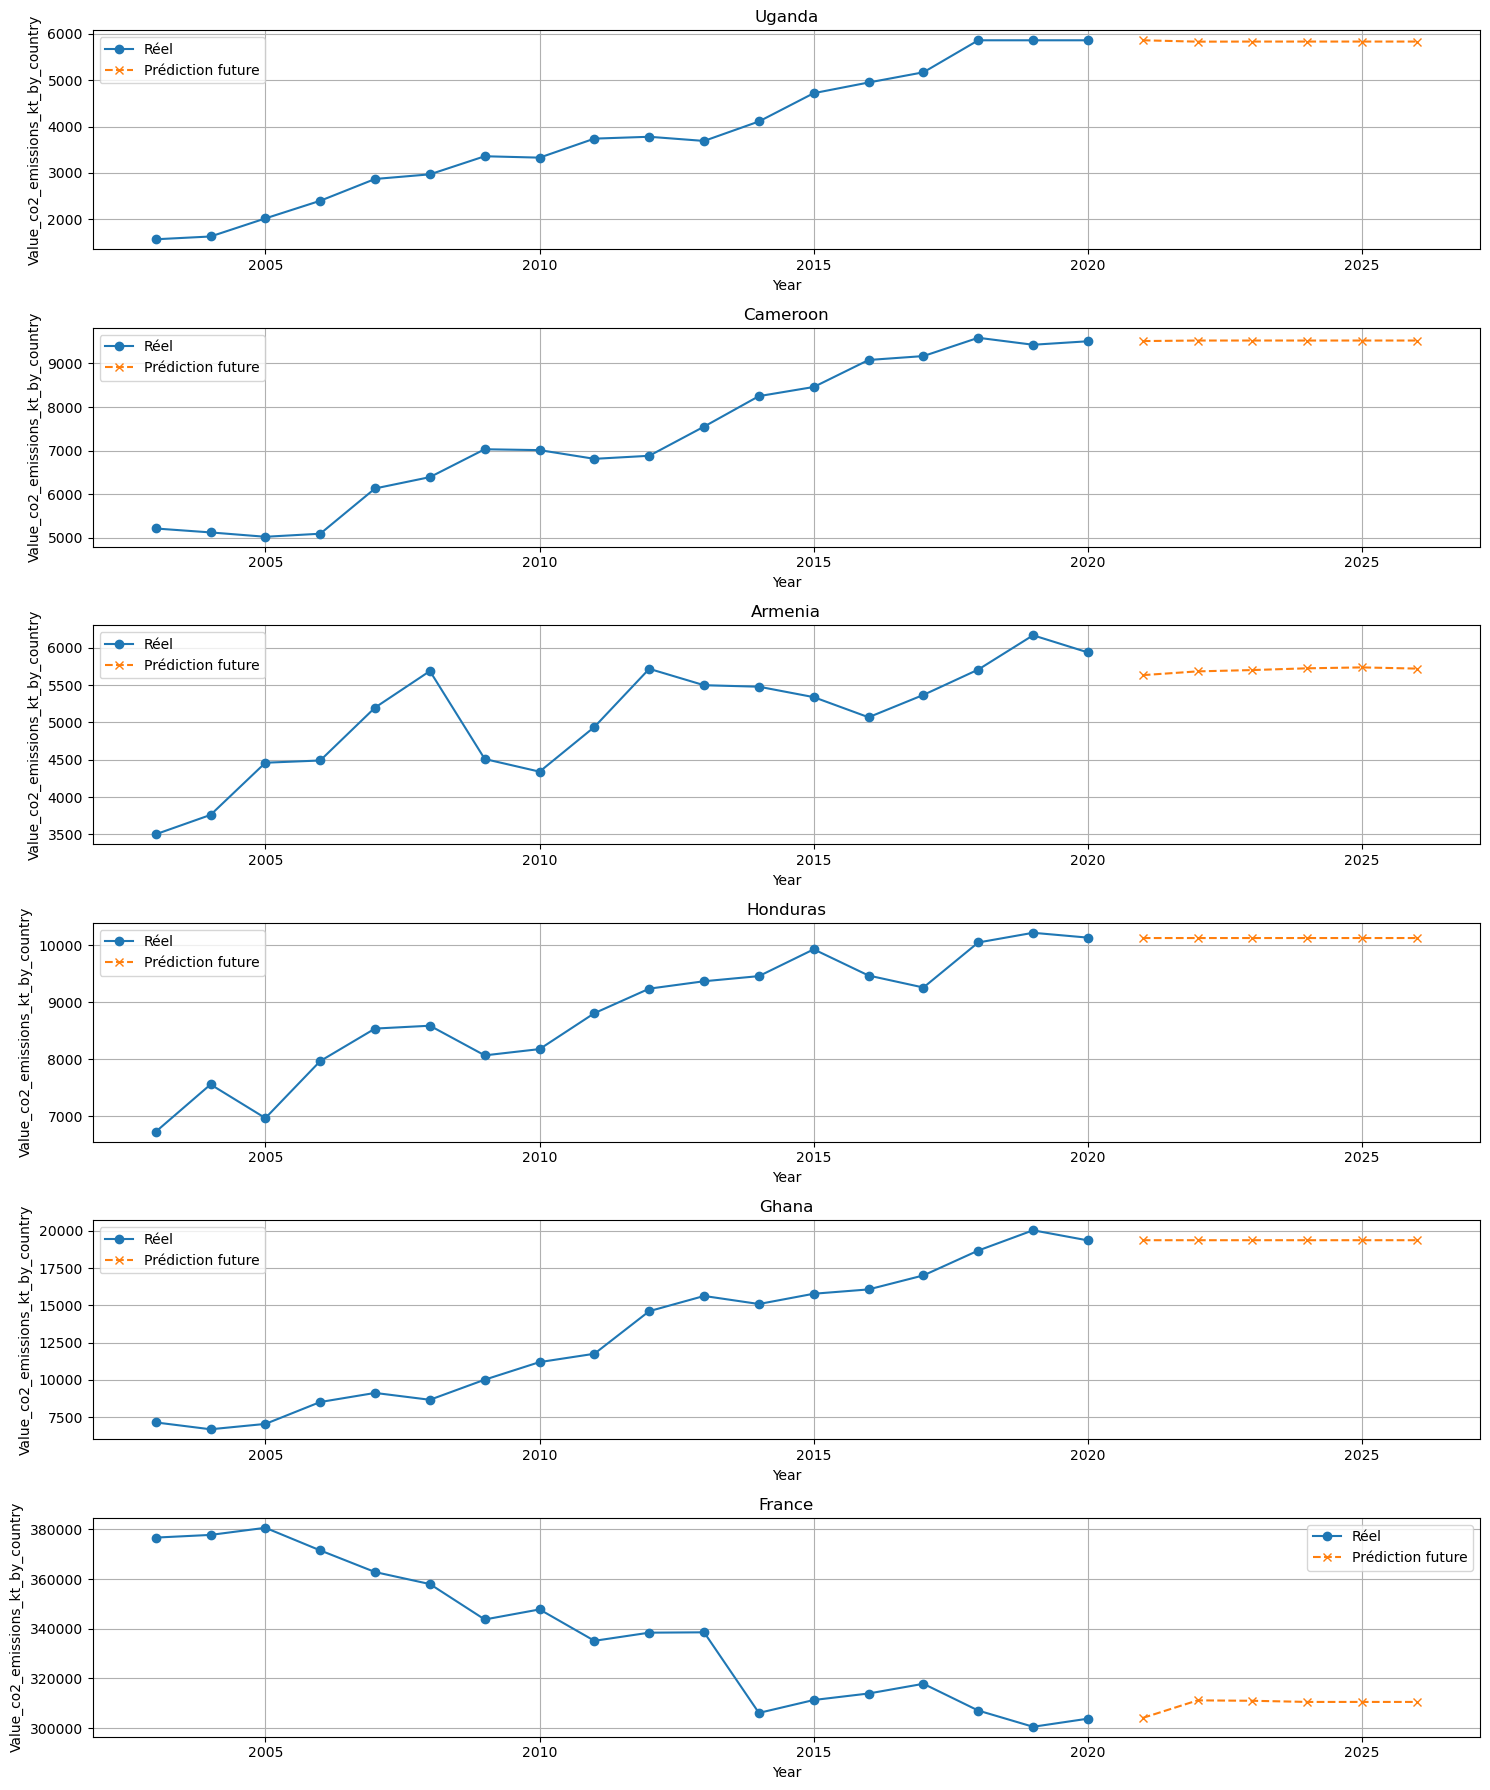

In [79]:
forecast_co2_future = xgb_forecast_future(
    df=df_co2,
    target="Value_co2_emissions_kt_by_country",
    start_year=2021,
    end_year=2026
)

Global trend shows an increase in CO₂ emissions, but the model does not account for local or international policies.
the results are very tame

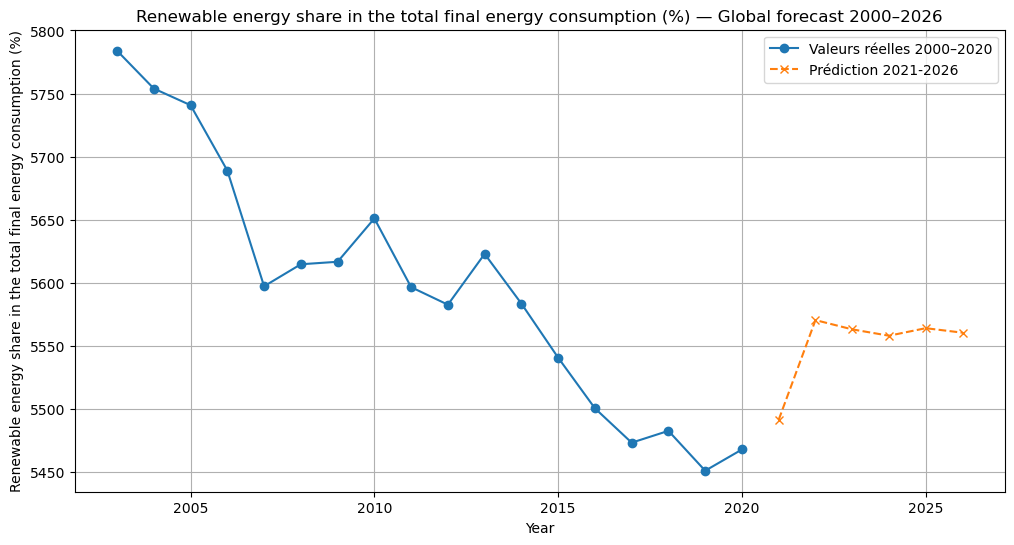

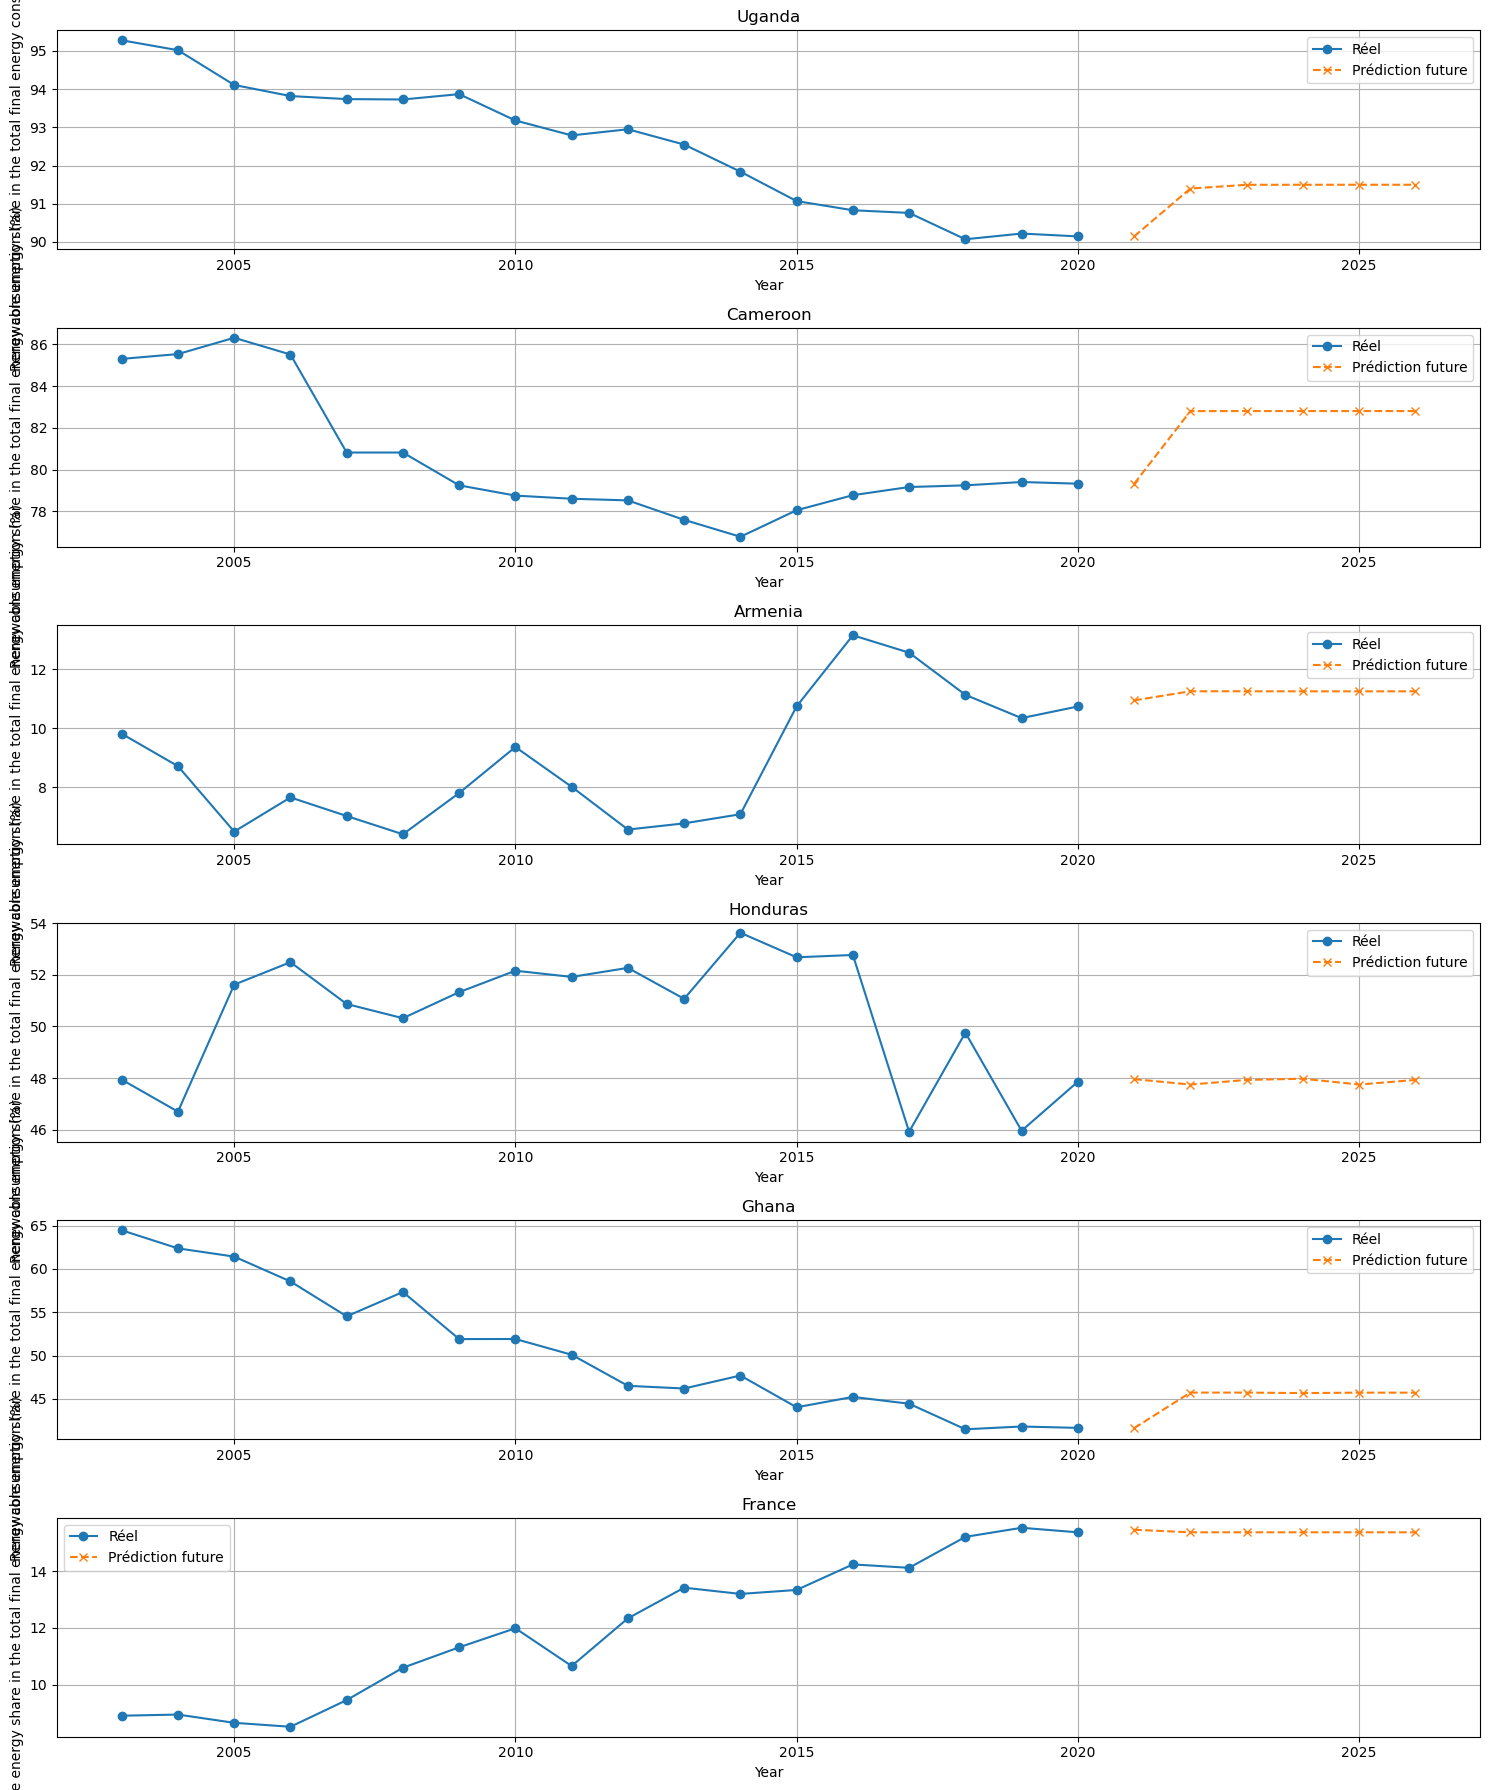

In [78]:
forecast_renew_future = xgb_forecast_future(
    df=df_renew,
    target="Renewable energy share in the total final energy consumption (%)",
    start_year=2021,
    end_year=2026
)

Global forecasts show a slight increase in renewable energy usage with a peak in 2021 2022 wich is strange but is probably explained by the higher tendency in 2020
The results on country level are still very tame. 

## Prophet

### Model test

In [55]:
def prophet_train_test(df, target_col, regressor_cols=None, train_end_year=2016, test_start_year=2017, test_end_year=2021, n_sample_countries=3):
    #preping the dataframe
    df_prophet = df.copy()
    df_prophet["ds"] = pd.to_datetime(df_prophet["Year"].astype(str) + "-01-01") # prophet have to take datetime
    df_prophet = df_prophet.rename(columns={target_col: "y"})

    cols_to_keep = ["Entity", "ds", "y"] + (regressor_cols if regressor_cols else [])
    df_prophet = df_prophet[cols_to_keep].sort_values(["Entity", "ds"]).reset_index(drop=True)

    #store forecasts
    all_forecasts = []
    countries = df_prophet["Entity"].unique()

    for country in countries:
        df_country = df_prophet[df_prophet["Entity"] == country].copy()
        
        # Split train/test
        train_df = df_country[df_country["ds"].dt.year <= train_end_year]
        test_df = df_country[(df_country["ds"].dt.year >= test_start_year) & (df_country["ds"].dt.year <= test_end_year)]
        if test_df.empty:
            continue
        
        # Fit Prophet
        m = Prophet()
        if regressor_cols:
            for reg in regressor_cols:
                m.add_regressor(reg)
        m.fit(train_df[["ds", "y"] + (regressor_cols if regressor_cols else [])])
        
        # prep futur dataframe for test
        future = test_df[["ds"] + (regressor_cols if regressor_cols else [])].copy()
        
        # predict
        forecast = m.predict(future)
        forecast["Entity"] = country
        all_forecasts.append(forecast[["Entity", "ds", "yhat", "yhat_lower", "yhat_upper"]])
    
    forecast_df = pd.concat(all_forecasts).reset_index(drop=True)

   # global results 
    plt.figure(figsize=(12,6))

    past_global = df_prophet[df_prophet["ds"].dt.year <= train_end_year].groupby("ds")["y"].mean()
    plt.plot(past_global.index, past_global.values, marker="o", label=f"Valeurs réelles train 2000–{train_end_year}")

    test_global = df_prophet[(df_prophet["ds"].dt.year >= test_start_year) & (df_prophet["ds"].dt.year <= test_end_year)]
    test_global = test_global.groupby("ds")["y"].mean()
    plt.plot(test_global.index, test_global.values, marker="s", label=f"Valeurs réelles test {test_start_year}–{test_end_year}")

    pred_global = forecast_df.groupby("ds")["yhat"].mean()
    plt.plot(pred_global.index, pred_global.values, marker="x", linestyle="--", label=f"Prédiction test {test_start_year}–{test_end_year}")

    lower_global = forecast_df.groupby("ds")["yhat_lower"].mean()
    upper_global = forecast_df.groupby("ds")["yhat_upper"].mean()
    plt.fill_between(pred_global.index, lower_global, upper_global, color="gray", alpha=0.3, label="Intervalle de confiance")

    plt.title(f"Prévisions globales – Test {test_start_year}–{test_end_year} (Prophet)")
    plt.xlabel("Année")
    plt.ylabel(target_col)
    plt.legend()
    plt.grid(True)
    plt.show()

   # graphe for random countries
    sample_countries = random.sample(list(countries), min(n_sample_countries, len(countries)))
    plt.figure(figsize=(12, 5*len(sample_countries)))

    for i, c in enumerate(sample_countries):
        plt.subplot(len(sample_countries), 1, i+1)
        train_c = df_prophet[(df_prophet["Entity"]==c) & (df_prophet["ds"].dt.year <= train_end_year)]
        plt.plot(train_c["ds"], train_c["y"], marker="o", label=f"Réel train 2000–{train_end_year}")

        test_c = df_prophet[(df_prophet["Entity"]==c) & (df_prophet["ds"].dt.year >= test_start_year)]
        plt.plot(test_c["ds"], test_c["y"], marker="s", label=f"Réel test {test_start_year}–{test_end_year}")

        fc_c = forecast_df[forecast_df["Entity"]==c]
        plt.plot(fc_c["ds"], fc_c["yhat"], marker="x", linestyle="--", label="Prédiction test")
        plt.fill_between(fc_c["ds"], fc_c["yhat_lower"], fc_c["yhat_upper"], color="gray", alpha=0.3)

        plt.title(f"Prévisions – {c}")
        plt.xlabel("Année")
        plt.ylabel(target_col)
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

    return forecast_df


12:32:42 - cmdstanpy - INFO - Chain [1] start processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:42 - cmdstanpy - INFO - Chain [1] start processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:43 - cmdstanpy - INFO - Chain [1] start processing
12:32:43 - cmdstanpy - INFO - Chain [1] done processing
12:32:43 - cmdstanpy - INFO - Chain [1] start processing
12:32:43 - cmdstanpy - INFO - Chain [1] done processing
12:32:43 - cmdstanpy - INFO - Chain [1] start processing
12:32:43 - cmdstanpy - INFO - Chain [1] done processing
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1]

12:33:11 - cmdstanpy - INFO - Chain [1] done processing
12:33:11 - cmdstanpy - INFO - Chain [1] start processing
12:33:11 - cmdstanpy - INFO - Chain [1] done processing
12:33:11 - cmdstanpy - INFO - Chain [1] start processing
12:33:12 - cmdstanpy - INFO - Chain [1] done processing
12:33:12 - cmdstanpy - INFO - Chain [1] start processing
12:33:12 - cmdstanpy - INFO - Chain [1] done processing
12:33:12 - cmdstanpy - INFO - Chain [1] start processing
12:33:12 - cmdstanpy - INFO - Chain [1] done processing
12:33:13 - cmdstanpy - INFO - Chain [1] start processing
12:33:13 - cmdstanpy - INFO - Chain [1] done processing
12:33:13 - cmdstanpy - INFO - Chain [1] start processing
12:33:13 - cmdstanpy - INFO - Chain [1] done processing
12:33:13 - cmdstanpy - INFO - Chain [1] start processing
12:33:14 - cmdstanpy - INFO - Chain [1] done processing
12:33:14 - cmdstanpy - INFO - Chain [1] start processing
12:33:14 - cmdstanpy - INFO - Chain [1] done processing
12:33:14 - cmdstanpy - INFO - Chain [1] 

12:33:40 - cmdstanpy - INFO - Chain [1] done processing
12:33:40 - cmdstanpy - INFO - Chain [1] start processing
12:33:41 - cmdstanpy - INFO - Chain [1] done processing
12:33:41 - cmdstanpy - INFO - Chain [1] start processing
12:33:41 - cmdstanpy - INFO - Chain [1] done processing
12:33:41 - cmdstanpy - INFO - Chain [1] start processing
12:33:41 - cmdstanpy - INFO - Chain [1] done processing
12:33:41 - cmdstanpy - INFO - Chain [1] start processing
12:33:42 - cmdstanpy - INFO - Chain [1] done processing
12:33:42 - cmdstanpy - INFO - Chain [1] start processing
12:33:42 - cmdstanpy - INFO - Chain [1] done processing
12:33:42 - cmdstanpy - INFO - Chain [1] start processing
12:34:00 - cmdstanpy - INFO - Chain [1] done processing
12:34:00 - cmdstanpy - INFO - Chain [1] start processing
12:34:00 - cmdstanpy - INFO - Chain [1] done processing
12:34:01 - cmdstanpy - INFO - Chain [1] start processing
12:34:01 - cmdstanpy - INFO - Chain [1] done processing
12:34:01 - cmdstanpy - INFO - Chain [1] 

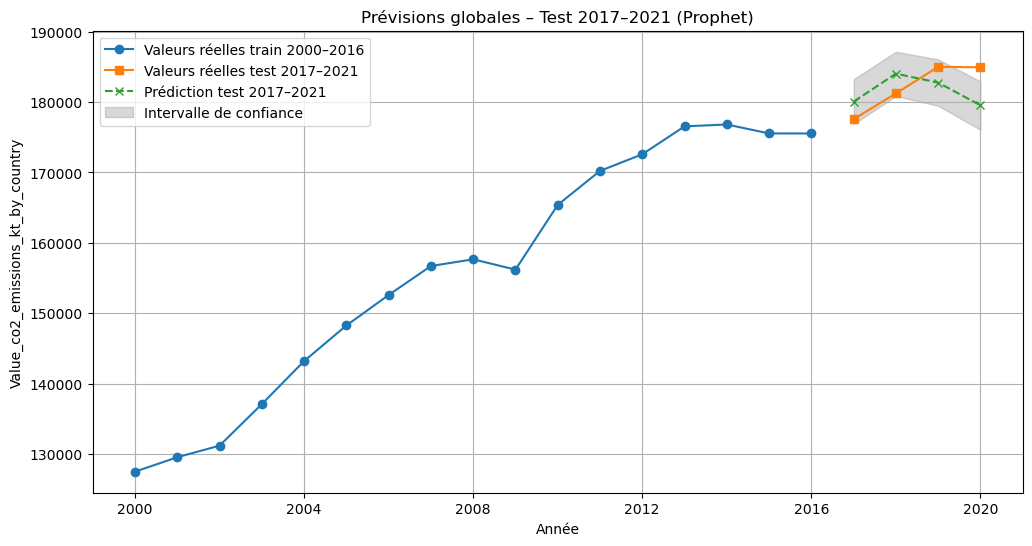

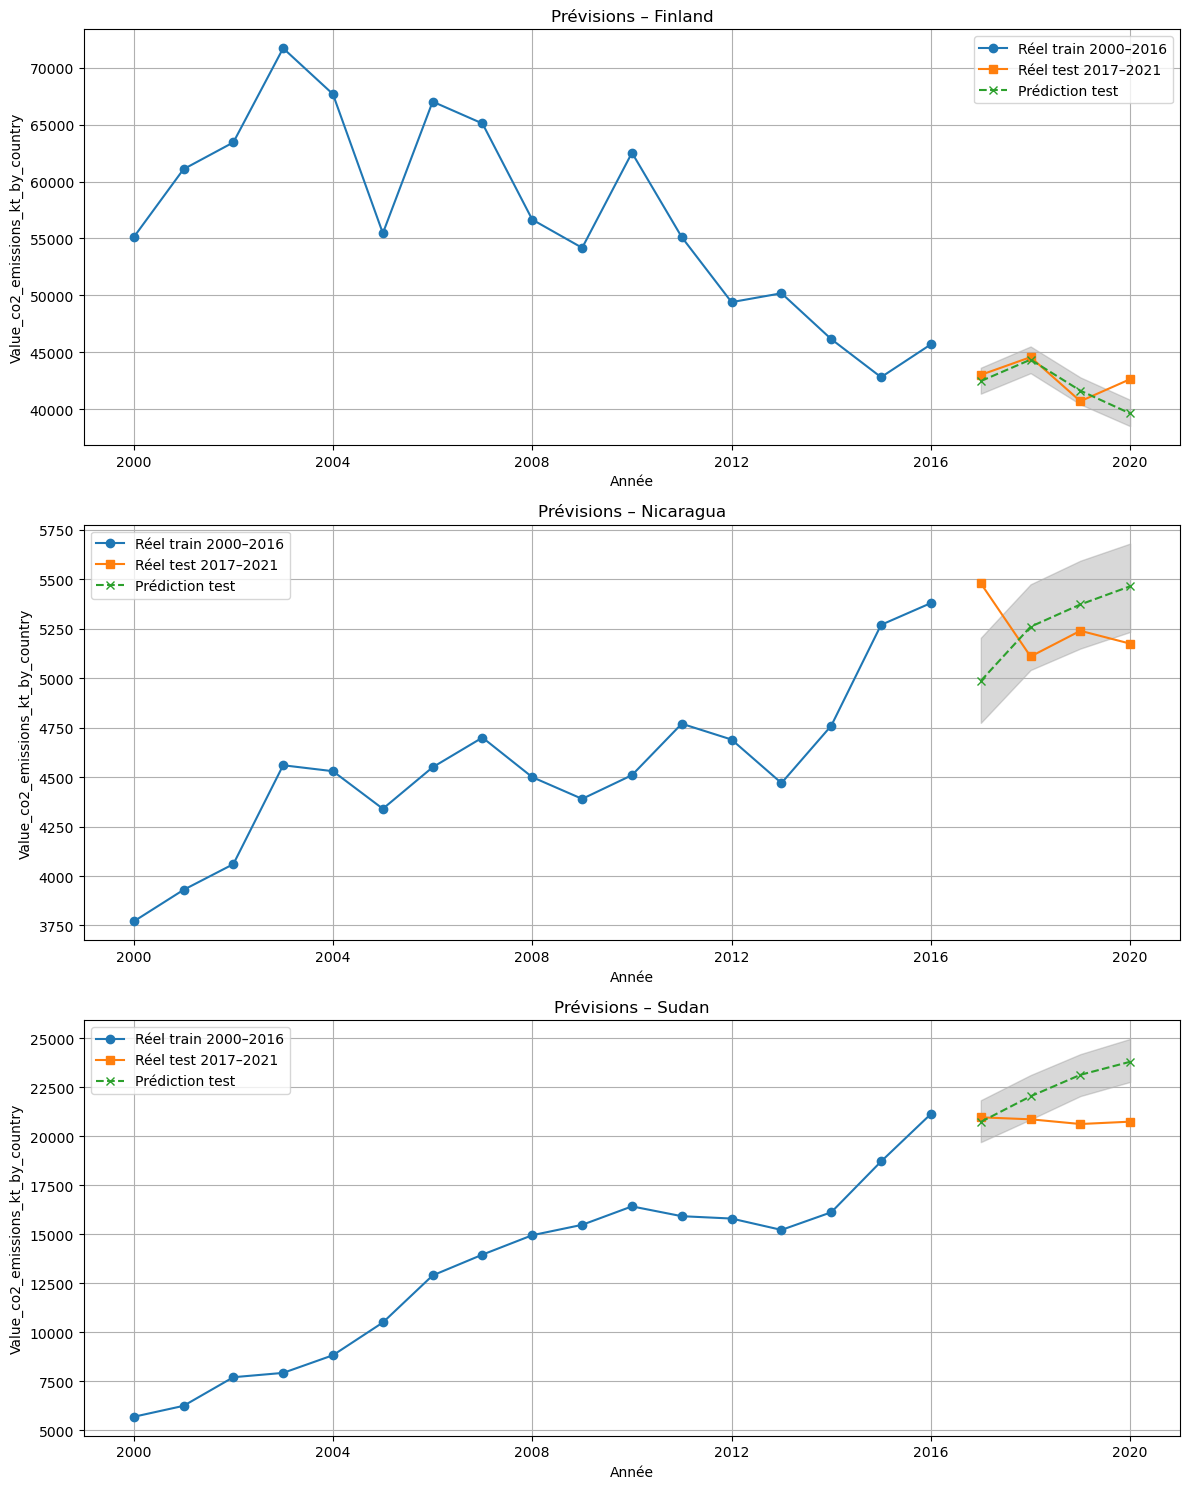

In [56]:
forecast_co2 = prophet_train_test(
    df=df_co2,
    target_col="Value_co2_emissions_kt_by_country",
    regressor_cols=["Electricity from fossil fuels (TWh)", "Electricity from renewables (TWh)"]
)

It's the inverse of xgboost the model captures better teh global tendancy than on country level.
What is still evident is that the model follows historical trends and we are missing policy impacts taht are not in the dataframe.

12:34:43 - cmdstanpy - INFO - Chain [1] start processing
12:34:43 - cmdstanpy - INFO - Chain [1] done processing
12:34:44 - cmdstanpy - INFO - Chain [1] start processing
12:34:44 - cmdstanpy - INFO - Chain [1] done processing
12:34:44 - cmdstanpy - INFO - Chain [1] start processing
12:34:44 - cmdstanpy - INFO - Chain [1] done processing
12:34:45 - cmdstanpy - INFO - Chain [1] start processing
12:34:45 - cmdstanpy - INFO - Chain [1] done processing
12:34:45 - cmdstanpy - INFO - Chain [1] start processing
12:34:45 - cmdstanpy - INFO - Chain [1] done processing
12:34:46 - cmdstanpy - INFO - Chain [1] start processing
12:34:46 - cmdstanpy - INFO - Chain [1] done processing
12:34:46 - cmdstanpy - INFO - Chain [1] start processing
12:34:46 - cmdstanpy - INFO - Chain [1] done processing
12:34:46 - cmdstanpy - INFO - Chain [1] start processing
12:34:47 - cmdstanpy - INFO - Chain [1] done processing
12:34:47 - cmdstanpy - INFO - Chain [1] start processing
12:34:47 - cmdstanpy - INFO - Chain [1]

12:35:12 - cmdstanpy - INFO - Chain [1] done processing
12:35:13 - cmdstanpy - INFO - Chain [1] start processing
12:35:13 - cmdstanpy - INFO - Chain [1] done processing
12:35:13 - cmdstanpy - INFO - Chain [1] start processing
12:35:13 - cmdstanpy - INFO - Chain [1] done processing
12:35:13 - cmdstanpy - INFO - Chain [1] start processing
12:35:13 - cmdstanpy - INFO - Chain [1] done processing
12:35:14 - cmdstanpy - INFO - Chain [1] start processing
12:35:14 - cmdstanpy - INFO - Chain [1] done processing
12:35:14 - cmdstanpy - INFO - Chain [1] start processing
12:35:14 - cmdstanpy - INFO - Chain [1] done processing
12:35:15 - cmdstanpy - INFO - Chain [1] start processing
12:35:15 - cmdstanpy - INFO - Chain [1] done processing
12:35:15 - cmdstanpy - INFO - Chain [1] start processing
12:35:15 - cmdstanpy - INFO - Chain [1] done processing
12:35:16 - cmdstanpy - INFO - Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing
12:35:16 - cmdstanpy - INFO - Chain [1] 

12:35:59 - cmdstanpy - INFO - Chain [1] done processing
12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:35:59 - cmdstanpy - INFO - Chain [1] done processing
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
12:36:00 - cmdstanpy - INFO - Chain [1] done processing
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
12:36:00 - cmdstanpy - INFO - Chain [1] done processing
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:02 - cmdstanpy - INFO - Chain [1] done processing
12:36:02 - cmdstanpy - INFO - Chain [1] start processing
12:36:02 - cmdstanpy - INFO - Chain [1] done processing
12:36:02 - cmdstanpy - INFO - Chain [1] 

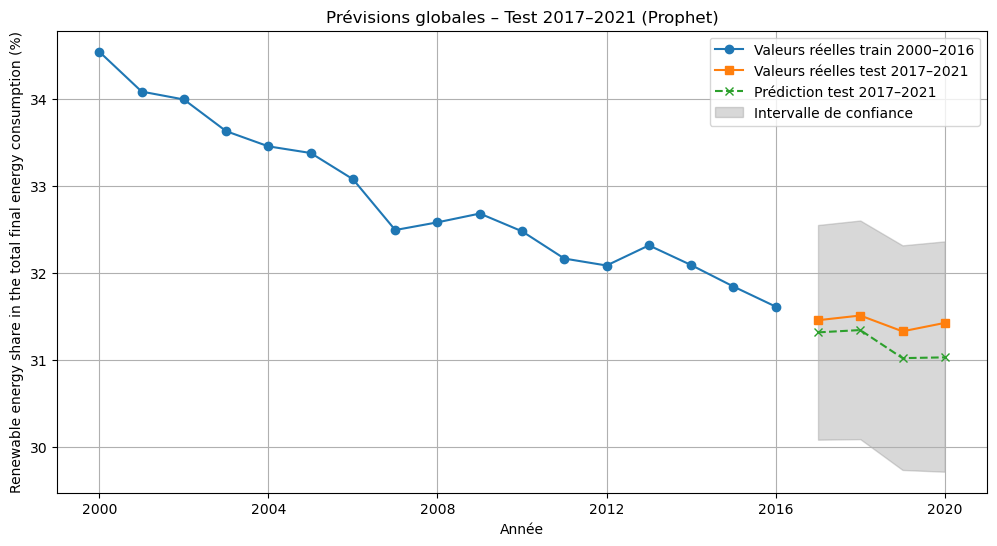

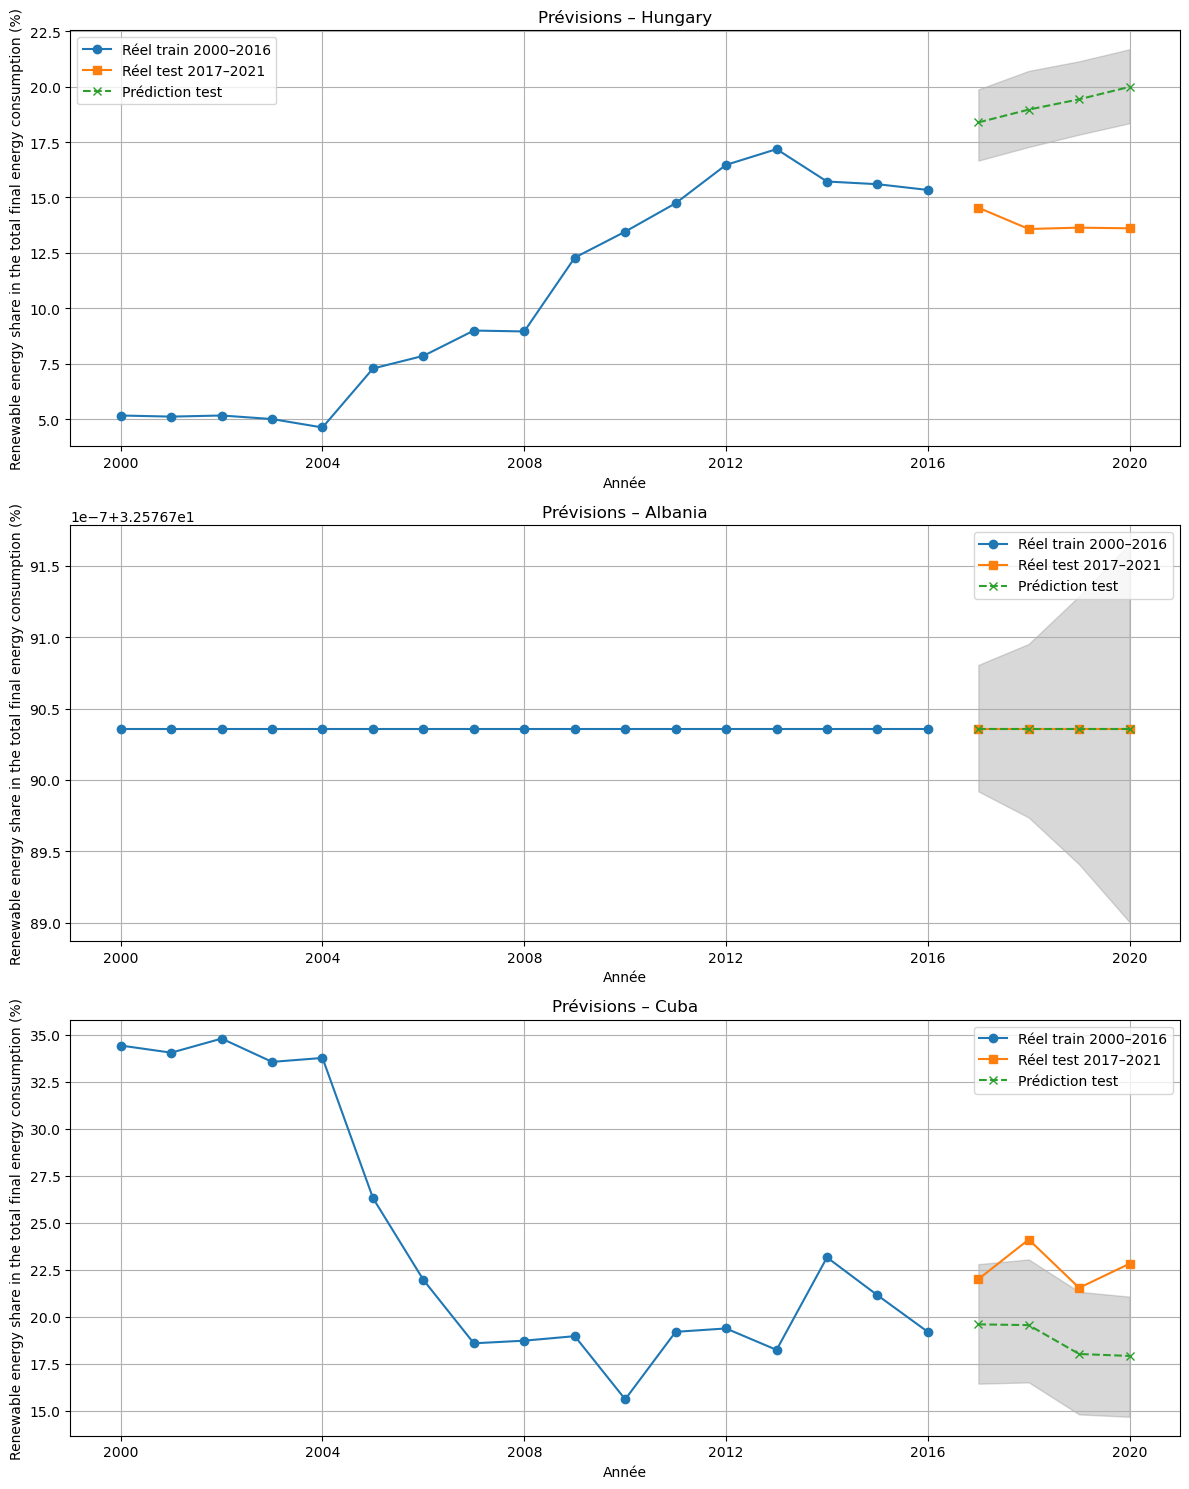

In [57]:
forecast_renew = prophet_train_test(
    df=df_renew,
    target_col="Renewable energy share in the total final energy consumption (%)",
    regressor_cols=['Access to electricity (% of population)',
    'Low-carbon electricity (% electricity)','Access to clean fuels for cooking']
)

Overall same observation than for the CO2 predictions. It's even clearer here that the model is better on global than country level.

In [58]:

def prophet_forecast(df, target_col, regressor_cols=None, start_year=2021, end_year=2026, n_sample_countries=3):
   
    #prep df for prophet
    df_prophet = df.copy()
    df_prophet["ds"] = pd.to_datetime(df_prophet["Year"].astype(str) + "-01-01")
    df_prophet = df_prophet.rename(columns={target_col: "y"})
    
    cols_to_keep = ["Entity", "ds", "y"] + (regressor_cols if regressor_cols else [])
    df_prophet = df_prophet[cols_to_keep].sort_values(["Entity", "ds"]).reset_index(drop=True)
    
    # store forecast
    all_forecasts = []
    countries = df_prophet["Entity"].unique()
    
    for country in countries:
        df_country = df_prophet[df_prophet["Entity"] == country].copy()
        
        # Fit Prophet
        m = Prophet()
        if regressor_cols:
            for reg in regressor_cols:
                m.add_regressor(reg)
        m.fit(df_country[["ds", "y"] + (regressor_cols if regressor_cols else [])])
        
        # Futur dataframe 
        future_years = pd.DataFrame({"ds": pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-01-01", freq="YS")})
        
        # For regressors, use the last available value
        if regressor_cols:
            last_row = df_country.iloc[-1]
            for reg in regressor_cols:
                future_years[reg] = last_row[reg]
        
        # Predict
        forecast = m.predict(future_years)
        forecast["Entity"] = country
        all_forecasts.append(forecast[["Entity", "ds", "yhat", "yhat_lower", "yhat_upper"]])
    
    forecast_df = pd.concat(all_forecasts).reset_index(drop=True)
    
    #global graph with past and futur
    plt.figure(figsize=(12,6))
    
    past_global = df_prophet.groupby("ds")["y"].mean()
    plt.plot(past_global.index, past_global.values, marker="o", label=f"Valeurs réelles {df_prophet['ds'].dt.year.min()}–{df_prophet['ds'].dt.year.max()}")
    
    future_global = forecast_df.groupby("ds")["yhat"].mean()
    plt.plot(future_global.index, future_global.values, marker="x", linestyle="--", label=f"Prédiction {start_year}–{end_year}")
    
    lower_global = forecast_df.groupby("ds")["yhat_lower"].mean()
    upper_global = forecast_df.groupby("ds")["yhat_upper"].mean()
    plt.fill_between(future_global.index, lower_global, upper_global, color="gray", alpha=0.3, label="Intervalle de confiance")
    
    plt.title(f"Prévisions globales {df_prophet['ds'].dt.year.min()}–{end_year} (Prophet)")
    plt.xlabel("Année")
    plt.ylabel(target_col)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # graph for random countries
    sample_countries = random.sample(list(countries), min(n_sample_countries, len(countries)))
    plt.figure(figsize=(12, 5*len(sample_countries)))
    
    for i, c in enumerate(sample_countries):
        plt.subplot(len(sample_countries), 1, i+1)
        past = df_prophet[df_prophet["Entity"]==c]
        plt.plot(past["ds"], past["y"], marker="o", label=f"Réel {df_prophet['ds'].dt.year.min()}–{df_prophet['ds'].dt.year.max()}")
        
        fc = forecast_df[forecast_df["Entity"]==c]
        plt.plot(fc["ds"], fc["yhat"], marker="x", linestyle="--", label=f"Prédiction {start_year}–{end_year}")
        plt.fill_between(fc["ds"], fc["yhat_lower"], fc["yhat_upper"], color="gray", alpha=0.3)
        
        plt.title(f"Prévisions – {c}")
        plt.xlabel("Année")
        plt.ylabel(target_col)
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return forecast_df


12:37:02 - cmdstanpy - INFO - Chain [1] start processing
12:37:02 - cmdstanpy - INFO - Chain [1] done processing
12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:03 - cmdstanpy - INFO - Chain [1] done processing
12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:03 - cmdstanpy - INFO - Chain [1] done processing
12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing
12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing
12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
12:37:06 - cmdstanpy - INFO - Chain [1]

12:37:34 - cmdstanpy - INFO - Chain [1] done processing
12:37:34 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing
12:37:35 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing
12:37:35 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing
12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing
12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing
12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing
12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing
12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing
12:37:38 - cmdstanpy - INFO - Chain [1] 

12:38:08 - cmdstanpy - INFO - Chain [1] done processing
12:38:08 - cmdstanpy - INFO - Chain [1] start processing
12:38:08 - cmdstanpy - INFO - Chain [1] done processing
12:38:08 - cmdstanpy - INFO - Chain [1] start processing
12:38:08 - cmdstanpy - INFO - Chain [1] done processing
12:38:08 - cmdstanpy - INFO - Chain [1] start processing
12:38:09 - cmdstanpy - INFO - Chain [1] done processing
12:38:09 - cmdstanpy - INFO - Chain [1] start processing
12:38:09 - cmdstanpy - INFO - Chain [1] done processing
12:38:10 - cmdstanpy - INFO - Chain [1] start processing
12:38:10 - cmdstanpy - INFO - Chain [1] done processing
12:38:10 - cmdstanpy - INFO - Chain [1] start processing
12:38:32 - cmdstanpy - INFO - Chain [1] done processing
12:38:32 - cmdstanpy - INFO - Chain [1] start processing
12:38:32 - cmdstanpy - INFO - Chain [1] done processing
12:38:32 - cmdstanpy - INFO - Chain [1] start processing
12:38:33 - cmdstanpy - INFO - Chain [1] done processing
12:38:33 - cmdstanpy - INFO - Chain [1] 

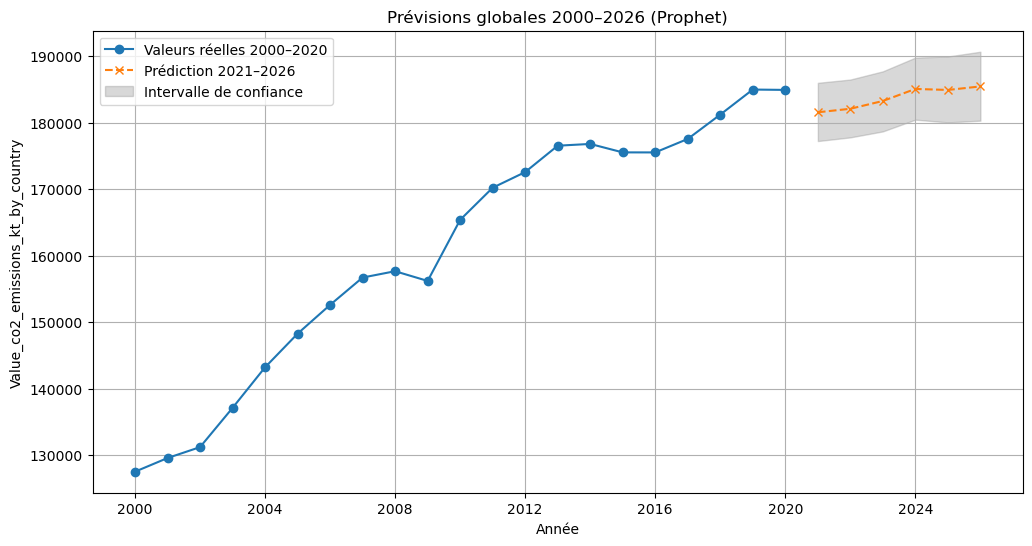

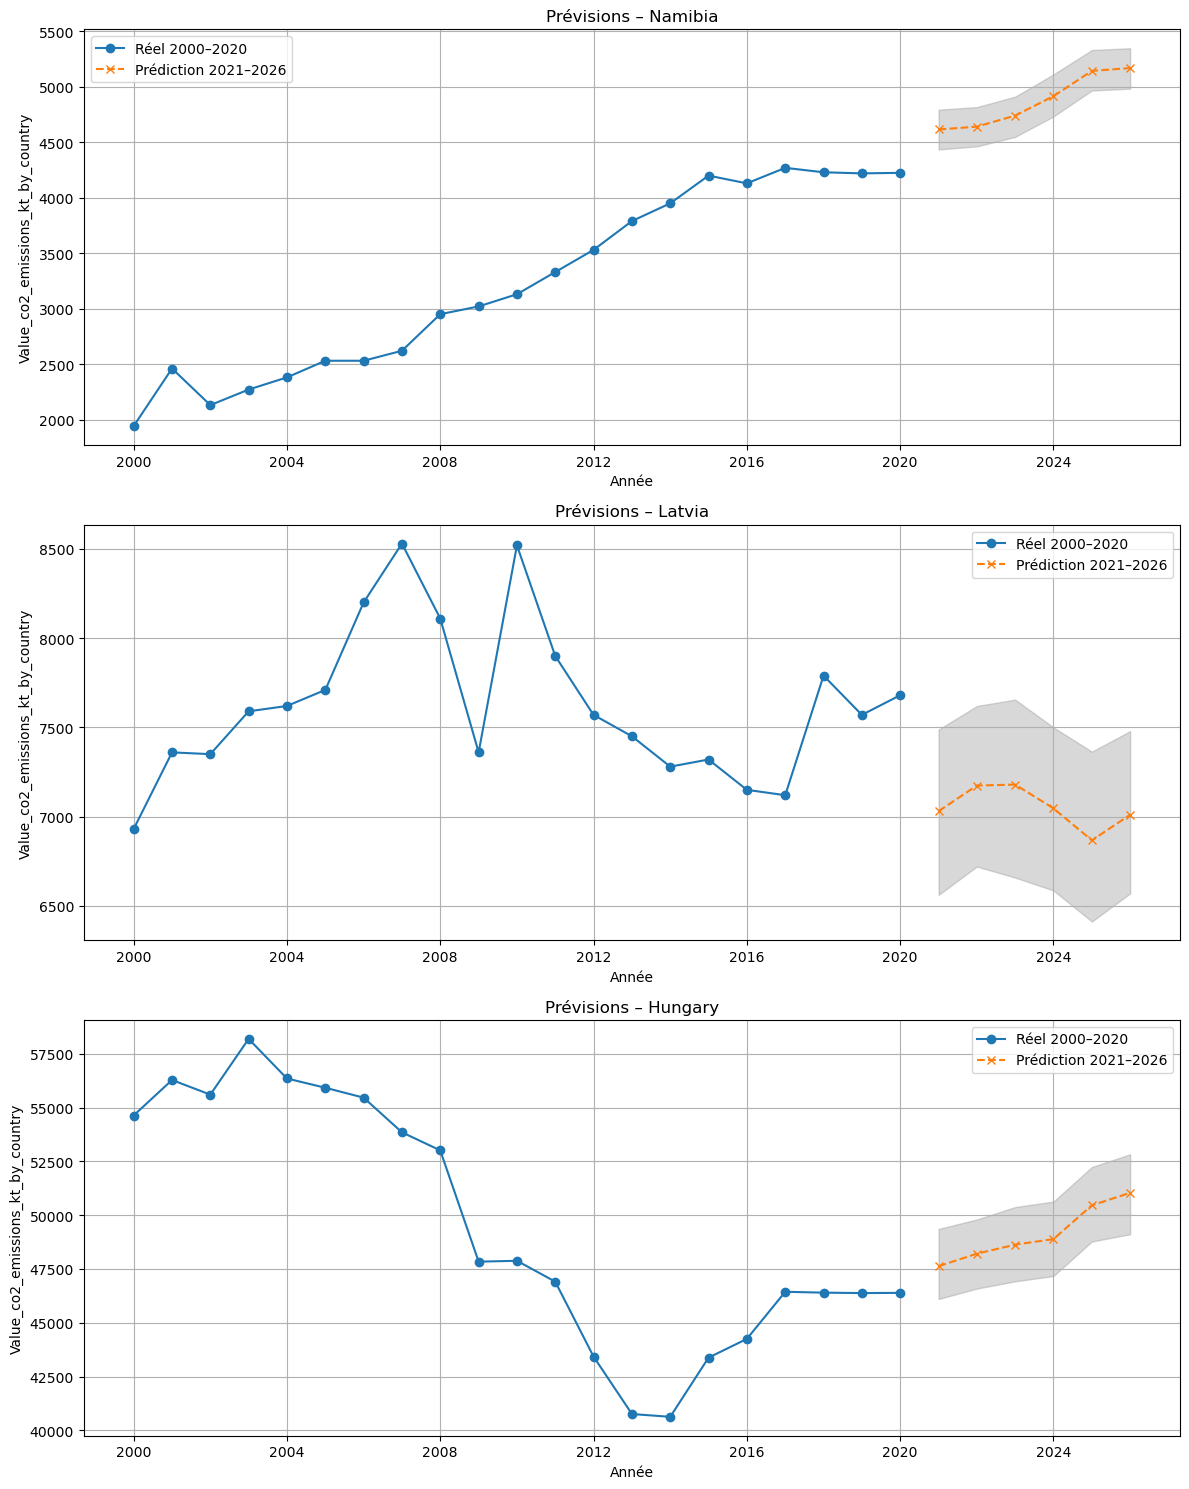

In [59]:
forecast_co2_future = prophet_forecast(
    df=df_co2,
    target_col="Value_co2_emissions_kt_by_country",
    regressor_cols=["Electricity from fossil fuels (TWh)", "Electricity from renewables (TWh)"],
    start_year=2021,
    end_year=2026
)

The model predicts a continued increase in CO₂ emissions.

Country-level results are moderate and follow historical trends.

Conclusion: Without policy changes, the current trend will worsen emissions.

12:38:38 - cmdstanpy - INFO - Chain [1] start processing
12:38:38 - cmdstanpy - INFO - Chain [1] done processing
12:38:38 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing
12:38:39 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing
12:38:39 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing
12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:40 - cmdstanpy - INFO - Chain [1] done processing
12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:40 - cmdstanpy - INFO - Chain [1] done processing
12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing
12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing
12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1]

12:39:10 - cmdstanpy - INFO - Chain [1] done processing
12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing
12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
12:39:14 - cmdstanpy - INFO - Chain [1] 

12:39:43 - cmdstanpy - INFO - Chain [1] done processing
12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing
12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing
12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:46 - cmdstanpy - INFO - Chain [1] done processing
12:39:46 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
12:39:48 - cmdstanpy - INFO - Chain [1] 

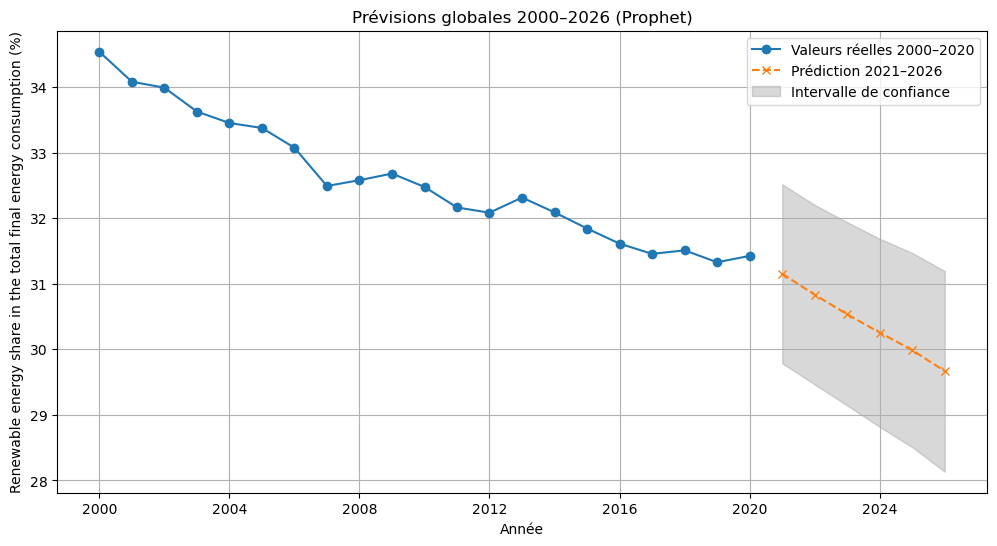

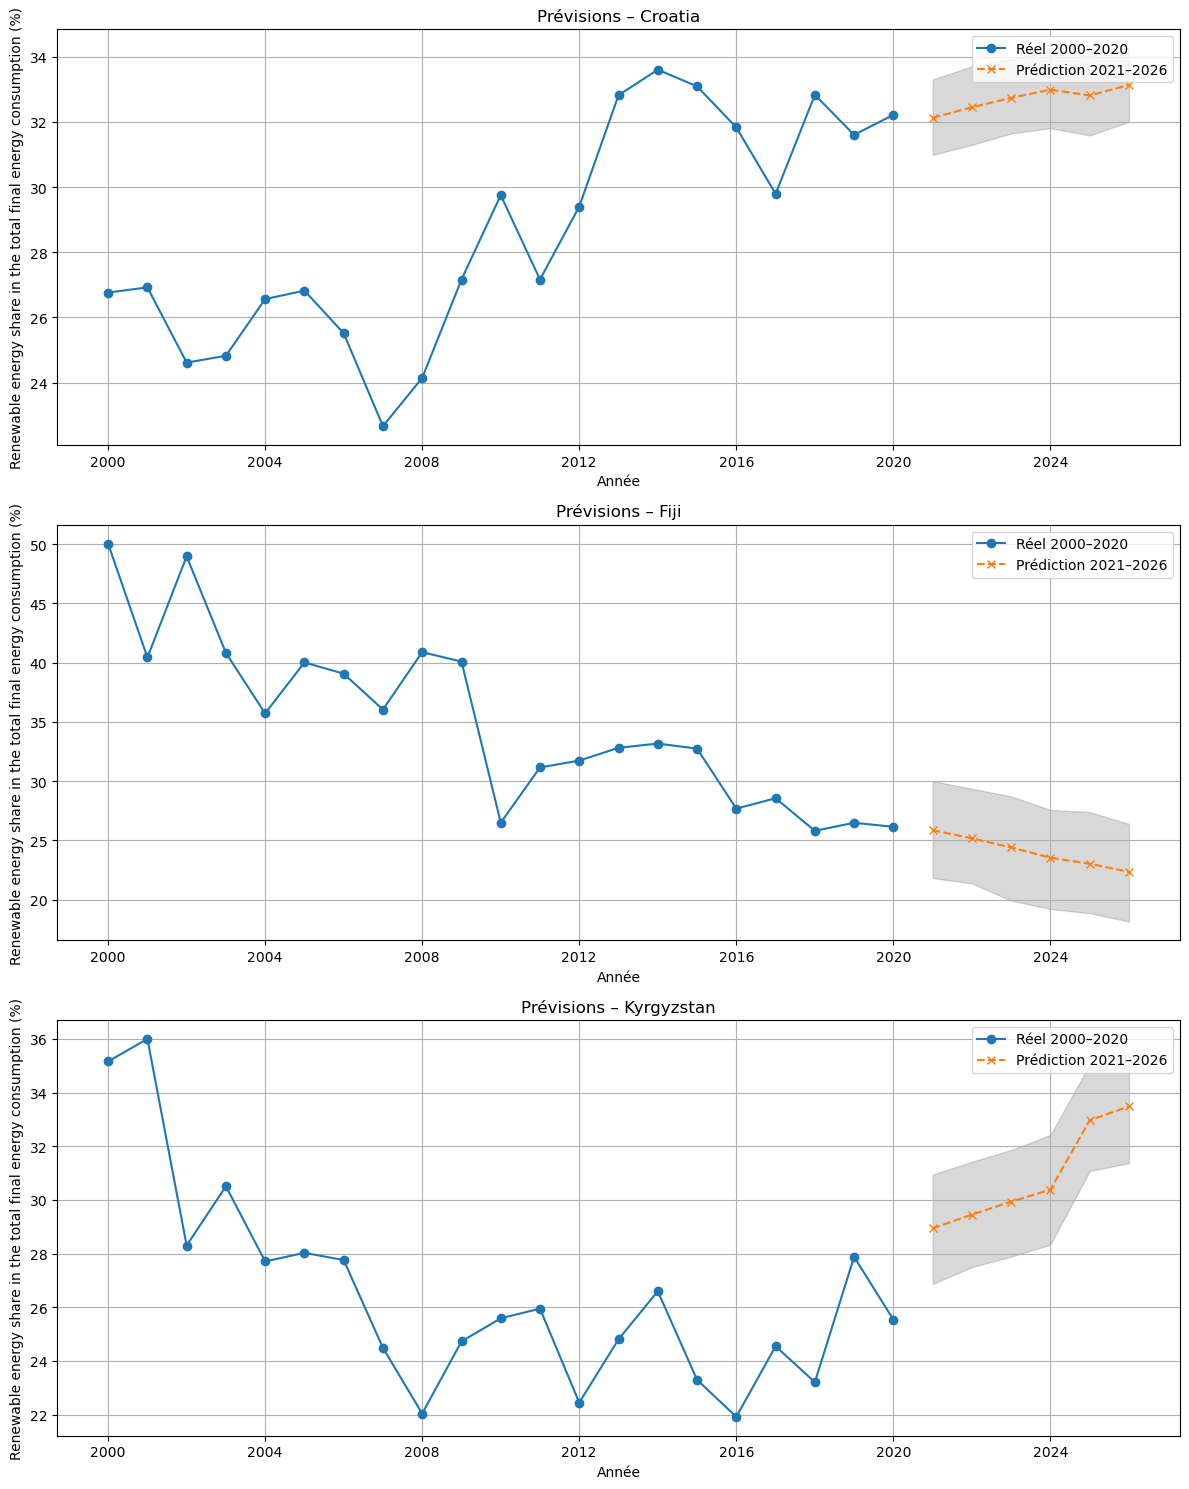

In [60]:
forecast_renew_future = prophet_forecast(
    df=df_renew,
    target_col="Renewable energy share in the total final energy consumption (%)",
    regressor_cols=["Access to electricity (% of population)",
                     "Low-carbon electricity (% electricity)",
                     "Access to clean fuels for cooking"],
    start_year=2021,
    end_year=2026
)


The model shows a general decrease in renewable energy usage if historical trends continue.

Recent policy decisions are not taken into account; predictions only reflect the past.

Conclusion: It is crucial to act to reverse the trend and increase responsible renewable energy consumption.

# General conclusion

Results show that, if historical trends continue, CO₂ emissions will keep increasing while renewable energy usage will remain low.

Policy action is critical: only ambitious, coordinated efforts can reverse these trends.

Our models are limited in capturing the impact of policies or recent changes due to the lack of data in this domain. However, if such features were taken into account, the results could look very different (at least we're hoping so)